In [680]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from astropy.io import fits
import astropy.wcs as wcs

from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io.votable import from_table, writeto

# Make .xml files of regions

In [679]:
yso_files = {'IR (Ohlendorf et al. 2013)': pd.read_csv('Preibisch_IR_sources_wise_radec.csv'),
             'X-RAY (Preibisch et al. 2014)': Table(fits.open('J_A+A_564_A120_table1.dat.fits')[1].data).to_pandas(),
             'Outflows (Reiter et al. 2022)': pd.read_csv('Reiter2022_cYSOs.csv'),
             'SPICY (Kuhn et al. 2021)': pd.read_csv('../Archive/SPICY_YSO_SubClasses.csv',comment='#')}

yso_files['X-RAY (Preibisch et al. 2014)'].columns = ['Seq', 'Name', 'RA', 'DEC', 'ePos', 'theta', 'Ctnet', 'e_Ctnet',
       'Bt', 'CHnet', 'fPSF', 'Signi', 'l_logPB', 'logPB', 'f_Seq', 'Var',
       'Emed']

sp_sky = SkyCoord(yso_files['SPICY (Kuhn et al. 2021)']['     RAdeg      DEdeg'].to_numpy(),unit=u.deg)
yso_files['SPICY (Kuhn et al. 2021)']['RA'] = sp_sky.ra/u.deg
yso_files['SPICY (Kuhn et al. 2021)']['DEC'] = sp_sky.dec/u.deg


In [681]:


yso_all = pd.DataFrame(data={'RA':[np.nan],'DEC':[np.nan],'Survey':[np.nan]})
# yso_all['Survey'] = ['Ohlendorf IR 2013']* len(yso_files['IR'])
# yso_all.append(yso_files['X-RAY'][['RA','DEC']])

for survey in yso_files:
    print(survey)
    tmp_df = yso_files[survey][['RA','DEC']].copy()
    tmp_df['Survey'] = [survey] * len(tmp_df)
    # tmp_df.to_csv(f'YSOs_RADEC{survey}.csv')
    tmp_votab = from_table(Table.from_pandas(tmp_df,units={'RA':u.deg,'DEC':u.deg}))
    writeto(tmp_votab, f"YSOs_{survey}.xml")

    yso_all = pd.concat([yso_all,tmp_df], ignore_index=True)
yso_all.dropna(inplace=True)
yso_all.to_csv('All_YSOs_RADEC.csv')

yso_all_votab = from_table(Table.from_pandas(yso_all,units={'RA':u.deg,'DEC':u.deg}))
writeto(yso_all_votab, "YSOs_prev_works.xml")

IR (Ohlendorf et al. 2013)
X-RAY (Preibisch et al. 2014)
Outflows (Reiter et al. 2022)
SPICY (Kuhn et al. 2021)
          RA        DEC                      Survey
1  159.72722 -58.971965  IR (Ohlendorf et al. 2013)
2  160.34684 -58.916061  IR (Ohlendorf et al. 2013)
3  160.26972 -58.846619  IR (Ohlendorf et al. 2013)
4  160.28245 -58.840355  IR (Ohlendorf et al. 2013)
5  160.27200 -58.835846  IR (Ohlendorf et al. 2013)


# Regions to .als

In [ ]:
import pyregion

def regions_to_als(filt):
    points = pyregion.open(f"/Users/breannacrompvoets/DAOPHOT/daophot4/{filt}_points.ds9")
    coords = points[0].coord_list
    x = [coords[i] for i in np.arange(0,len(coords),2)]
    y = [coords[i+1] for i in np.arange(0,len(coords),2)]
    
    f = open(f"/Users/breannacrompvoets/DAOPHOT/daophot4/{filt}_points.als",'w')
    f.write(" NL    NX    NY  LOWBAD HIGHBAD  THRESH     AP1  PH/ADU  RNOISE    FRAD\n 1 14215  8421   -54.3  5000.0  47.060   1.500  10.000   9.150   3.000\n \n")
    for i in range(0,len(x)):
        f.write(f"900000{i} {x[i]}  {y[i]}  10  0   0   1   0   0 \n")
    f.close()
    return f"{filt} is saved as als"

In [ ]:
filters = ['f090w','f187n','f200w','f335m','f444w','f470n']
for f in filters:
    regions_to_als(f)

# Check .lst files for dubious detections - located in manual_check_image.py


In [682]:
filt = 'f200w'
os.replace('/Users/breannacrompvoets/Documents/Star_Formation/YSO+Classification/Webb_PRF_Classification/temp.txt', f"/users/breannacrompvoets/DAOPHOT/NGC3324/{filt}_ADU.nei")

In [572]:
print(dao_l.x.iloc[i],dao_l.y.iloc[i])

dao_l

13149.0 595.0


ID         x        y     Mag   Col1  Col2
0     14425   6490.00  5175.00   9.580  0.023   NaN
1     26555   5219.00  7417.00   9.649  0.023   NaN
2     14330   6418.00  5150.00   9.744  0.046   NaN
3      2022  13149.00   595.00   9.832  0.027   NaN
4      5258   3062.59  1603.00   9.843  0.038   NaN
...     ...       ...      ...     ...    ...   ...
1595  32350  10306.58  8330.64  12.655  0.005   NaN
1596   8445    585.14  2714.17  12.655  0.009   NaN
1597   1945  12980.10   569.00  12.655  0.190   NaN
1598    269     61.19   124.30  12.656  0.012   NaN
1599  22470   1920.67  6684.12  12.656  0.004   NaN

[1600 rows x 6 columns]

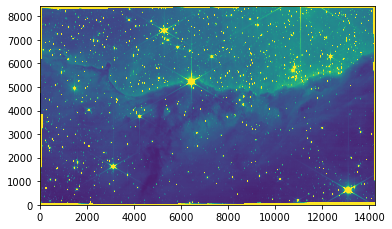

In [571]:
filt = 'f090w'
cols_lst = ['ID','x','y','Mag','Col1','Col2']
dao_l = pd.read_csv(f"~/DAOPHOT/NGC3324/{filt}_ADU.lst", header=None,delim_whitespace=True, skiprows=3, names=cols_lst)
# i +=1
hdu = fits.open("/Users/breannacrompvoets/DAOPHOT/NGC3324/"+filt+"_ADU.fits")
m = np.mean(hdu[0].data)
s = np.std(hdu[0].data)
plt.imshow(hdu[0].data,vmax=1200,origin='lower')
# plt.plot(dao_l.x.iloc[i],dao_l.y.iloc[i],'s',color='red',alpha=0.5)
# plt.xlim(dao_l.x.iloc[i]-p_s,dao_l.x.iloc[i]+p_s)
# plt.ylim(dao_l.y.iloc[i]-p_s,dao_l.y.iloc[i]+p_s)
# plt.show(block=False)
# plt.pause(2)
# plt.close()

# Review .raw files/colours

8756


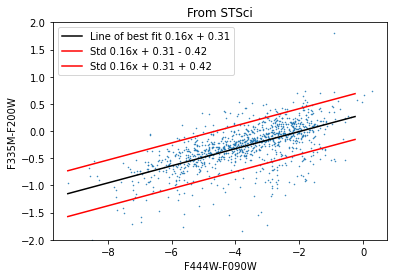

In [756]:
jwst = pd.read_csv("Archive/CC_Catalog_May112023.csv")
print(len(jwst))
jwst_pl = jwst.dropna(subset=['isophotal_vegamag_f090w','isophotal_vegamag_f200w','isophotal_vegamag_f335m','isophotal_vegamag_f444w'])
col_x_j = jwst_pl.isophotal_vegamag_f444w-jwst_pl.isophotal_vegamag_f090w
col_y_j = jwst_pl.isophotal_vegamag_f335m-jwst_pl.isophotal_vegamag_f200w

lin_fit = np.polyfit(col_x_j, col_y_j, 1)

xlim = np.arange(min(col_x_j),max(col_x_j),1)
plt.plot(col_x_j, col_y_j,'.',markersize=1)
plt.plot(xlim, lin_fit[0] * xlim + lin_fit[1], 'k', label=f'Line of best fit {lin_fit[0]:4.2f}x + {lin_fit[1]:4.2f}')
plt.plot(xlim, lin_fit[0] * xlim + lin_fit[1] - np.std(col_y_j), 'r',  label=f'Std {lin_fit[0]:4.2f}x + {lin_fit[1]:4.2f} - {np.std(col_y_j):4.2f}')
plt.plot(xlim, lin_fit[0] * xlim + lin_fit[1] + np.std(col_y_j), 'r',  label=f'Std {lin_fit[0]:4.2f}x + {lin_fit[1]:4.2f} + {np.std(col_y_j):4.2f}')
# plt.plot(jwst.isophotal_vegamag_f200w-jwst.isophotal_vegamag_f090w, jwst.isophotal_vegamag_f444w-jwst.isophotal_vegamag_f335m,'.')
plt.xlabel('F444W-F090W')
plt.ylabel('F335M-F200W')

plt.ylim(-2,2)
plt.title('From STSci')
plt.legend()
plt.savefig('./Figures/DAOPHOT_Comp_StSci_2.png',dpi=300)

In [911]:
head = ['Index','x','y','f090w','e_f090w','f187n','e_f187n','f200w','e_f200w','f335m','e_f335m','f444w','e_f444w','f470n','e_f470n']
filepath = '/users/breannacrompvoets/DAOPHOT/NGC3324/'
dao = pd.read_csv(filepath+"ngc3324_pi.raw", header=None,delim_whitespace=True, skiprows=3, names=head).iloc[::2, :]
dao.set_index('Index',inplace=True)
dao.where(dao!=99.9999, np.nan,inplace=True)
dao.where(dao!=9.9999, np.nan,inplace=True)
dao

x         y   f090w  e_f090w   f187n  e_f187n   f200w  \
Index                                                                    
1.0         42.204  4439.155  16.211   0.0693  15.321   0.0262  12.718   
2.0         50.768   513.318  16.724   0.0666  16.351   0.0473  13.687   
3.0         51.753   505.226  15.865   0.0365  15.099   0.0281  12.434   
4.0         55.969  1144.317  16.448   0.0743  16.462   0.0831  13.681   
5.0         69.665  1584.088  16.939   0.0835  16.183   0.0762  13.781   
...            ...       ...     ...      ...     ...      ...     ...   
18342.0  14166.960   998.771     NaN      NaN     NaN      NaN  13.563   
18343.0  14170.900   479.594  15.011   0.0412  14.449   0.0760     NaN   
18344.0  14177.700  1016.987     NaN      NaN     NaN      NaN  14.924   
18345.0  14178.100   856.664     NaN      NaN     NaN      NaN  13.860   
18346.0  14181.770   590.579     NaN      NaN     NaN      NaN  11.974   

         e_f200w   f335m  e_f335m   f444w  e_f444w   f470n  e_f470n  
Index                                                                
1.0       0.0314     NaN      NaN     NaN      NaN     NaN      NaN  
2.0       0.0269     NaN      NaN     NaN      NaN     NaN      NaN  
3.0       0.0175     NaN      NaN     NaN      NaN     NaN      NaN  
4.0       0.0264     NaN      NaN     NaN      NaN     NaN      NaN  
5.0       0.0244     NaN      NaN     NaN      NaN     NaN      NaN  
...          ...     ...      ...     ...      ...     ...      ...  
18342.0   0.0165  15.927   0.0291  15.223   0.0225     NaN      NaN  
18343.0      NaN  13.602   0.0236  12.966   0.0331  16.296   0.0242  
18344.0   0.0275  17.171   0.0533  16.134   0.0333     NaN      NaN  
18345.0   0.0318  16.248   0.0380  15.553   0.0330     NaN      NaN  
18346.0   0.0231  14.561   0.0198  13.779   0.0192  17.221   0.0395  

[18346 rows x 14 columns]

In [825]:
def ccd(filtx1,filtx2,filty1,filty2,dao):
    fig = plt.subplots(dpi=300)
    err = np.sqrt(dao['e_'+filtx1].values**2+dao['e_'+filtx2].values**2+dao['e_'+filty1].values**2+dao['e_'+filty2].values**2)
    plt.scatter(dao[filtx1]-dao[filtx2], dao[filty1]-dao[filty2],c=err,marker='.', s=1,cmap='copper')
    plt.xlabel(filtx1+'-'+filtx2)
    plt.ylabel(filty1+'-'+filty2)
    plt.colorbar(label='Propogated Error')
    return fig

def cmd(filtx1,filtx2,filty,dao):
    fig = plt.subplots(dpi=300)
    err = np.sqrt(dao['e_'+filtx1].values**2+dao['e_'+filtx2].values**2+dao['e_'+filty].values**2)
    dao_tmp = dao.copy()
    dao_tmp = dao_tmp[dao_tmp['e_'+filty]<0.07]
    dao_tmp = dao_tmp[np.sqrt(dao_tmp['e_'+filtx1]**2+dao_tmp['e_'+filtx2]**2)<0.1]
    err = np.sqrt(dao_tmp['e_'+filtx1].values**2+dao_tmp['e_'+filtx2].values**2+dao_tmp['e_'+filty].values**2)
    # dao = dao[err<0.07]
    plt.scatter(dao_tmp[filtx1]-dao_tmp[filtx2], dao_tmp[filty],c=err,marker='.', s=1,cmap='copper')
    plt.xlabel(filtx1+'-'+filtx2)
    plt.ylabel(filty)
    plt.gca().invert_yaxis()
    plt.colorbar(label='Propogated Error')
    return fig


def med(filt,dao):
    fig = plt.subplots(dpi=300)
    plt.scatter(dao[filt],dao['e_'+filt],c=dao['e_'+filt],cmap='copper',marker='.', s=1)
    plt.xlabel(filt)
    plt.ylabel('e_'+filt)
    plt.colorbar(label='e_'+filt)
    return fig

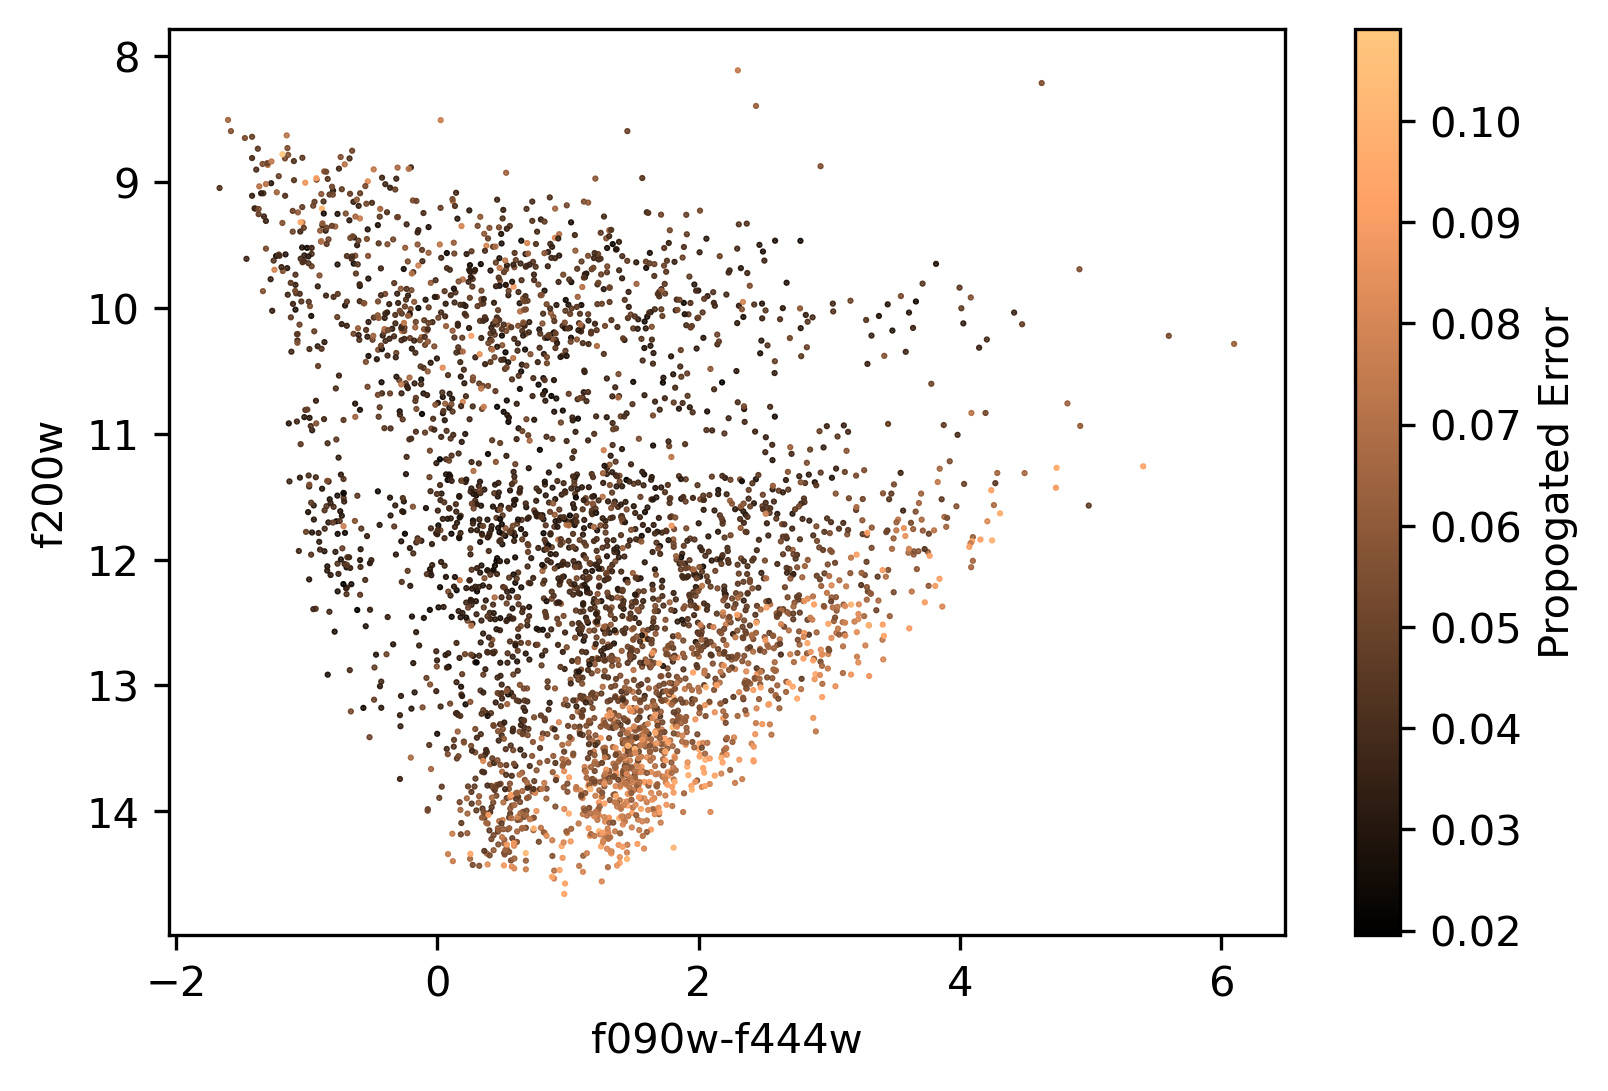

In [826]:

# med('f200w',dao)
dao_tmp = dao.copy()
dao_tmp = dao_tmp[dao_tmp.e_f200w<0.07]
dao_tmp = dao_tmp[np.sqrt(dao_tmp.e_f090w**2+dao_tmp.e_f444w**2)<0.1]
cmd('f090w','f444w','f200w',dao_tmp.copy())
# plt.legend('\sigma_{200} < 0.07')
plt.savefig('Figures/plot1.png')

In [421]:
-0.03*np.arange(-6,5)-0.35

array([-0.17, -0.2 , -0.23, -0.26, -0.29, -0.32, -0.35, -0.38, -0.41,
       -0.44, -0.47])

In [827]:
def rms(filt1x, filt2x, filt1y, filt2y, df, linestart, lineend):
    df_points = np.array(df[filt1x]-df[filt2x],df[filt1y]-df[filt2y])
    d = []
    for i in range(0,len(df_points)):
        d_tmp = np.cross(lineend-linestart,df_points[i]-linestart)/np.linalg.norm(lineend-linestart)
        if abs(d_tmp) < 0.4:
            d.append(d_tmp)
    
    rms = np.sqrt(np.mean(np.array(d)**2))

    print("RMS from error propagation: ", np.mean(np.sqrt(df['e_'+filt1x].values**2+df['e_'+filt1y].values**2+df['e_'+filt2x].values**2+df['e_'+filt2y].values**2)))
    print("RMS = ", rms)
    return rms
    
rms('f444w','f090w','f090w','f200w',dao, np.array((-6,-0.17)),np.array((4,-0.47)))


RMS from error propagation:  0.06684439032802549
RMS =  0.21950443479714588


0.21950443479714588

In [462]:
filters = ['f090w','f187n','f200w','f335m','f444w','f470n']
cols_lst = ['ID','x','y', 'Mag', 'err_1', 'err_2']

for filt in filters:
    hdu = fits.open("/Users/breannacrompvoets/DAOPHOT/NGC3324/"+filt+"_ADU.fits")
    w_jwst = wcs.WCS(hdu[0].header)
    dao_f = pd.read_csv("/Users/breannacrompvoets/DAOPHOT/NGC3324/"+filt+"_ADU.lst", header=None,delim_whitespace=True, skiprows=3, names=cols_lst)
    print(len(dao_f))
    SkyCoords_tmp_dao_f = w_jwst.pixel_to_world(dao_f.x,dao_f.y)
    dao_f['RA'] = SkyCoords_tmp_dao_f.ra
    dao_f['DEC'] = SkyCoords_tmp_dao_f.dec
    dao_f_tab = Table.from_pandas(dao_f,units={'x':'pix','y':'pix','RA':u.deg,'DEC':u.deg})
    dao_f_votab = from_table(dao_f_tab)
    
    writeto(dao_f_votab, "/Users/breannacrompvoets/DAOPHOT/NGC3324/"+filt+"_ADU_lst.xml")


800


NameError: name 'Table' is not defined

# Make delta-delta plots

In [958]:
head = ['Index','x','y','f090w','e_f090w','f187n','e_f187n','f200w','e_f200w','f335m','e_f335m','f444w','e_f444w','f470n','e_f470n']
filepath = '/users/breannacrompvoets/DAOPHOT/NGC3324/'
dao = pd.read_csv(filepath+"ngc3324_pi.raw", header=None,delim_whitespace=True, skiprows=3, names=head).iloc[::2, :]
dao.set_index('Index',inplace=True)
dao.where(dao!=99.9999, np.nan,inplace=True)
dao.where(dao!=9.9999, np.nan,inplace=True)
dao

x         y   f090w  e_f090w   f187n  e_f187n   f200w  \
Index                                                                    
1.0         42.204  4439.155  16.211   0.0693  15.321   0.0262  12.718   
2.0         50.768   513.318  16.724   0.0666  16.351   0.0473  13.687   
3.0         51.753   505.226  15.865   0.0365  15.099   0.0281  12.434   
4.0         55.969  1144.317  16.448   0.0743  16.462   0.0831  13.681   
5.0         69.665  1584.088  16.939   0.0835  16.183   0.0762  13.781   
...            ...       ...     ...      ...     ...      ...     ...   
18342.0  14166.960   998.771     NaN      NaN     NaN      NaN  13.563   
18343.0  14170.900   479.594  15.011   0.0412  14.449   0.0760     NaN   
18344.0  14177.700  1016.987     NaN      NaN     NaN      NaN  14.924   
18345.0  14178.100   856.664     NaN      NaN     NaN      NaN  13.860   
18346.0  14181.770   590.579     NaN      NaN     NaN      NaN  11.974   

         e_f200w   f335m  e_f335m   f444w  e_f444w   f470n  e_f470n  
Index                                                                
1.0       0.0314     NaN      NaN     NaN      NaN     NaN      NaN  
2.0       0.0269     NaN      NaN     NaN      NaN     NaN      NaN  
3.0       0.0175     NaN      NaN     NaN      NaN     NaN      NaN  
4.0       0.0264     NaN      NaN     NaN      NaN     NaN      NaN  
5.0       0.0244     NaN      NaN     NaN      NaN     NaN      NaN  
...          ...     ...      ...     ...      ...     ...      ...  
18342.0   0.0165  15.927   0.0291  15.223   0.0225     NaN      NaN  
18343.0      NaN  13.602   0.0236  12.966   0.0331  16.296   0.0242  
18344.0   0.0275  17.171   0.0533  16.134   0.0333     NaN      NaN  
18345.0   0.0318  16.248   0.0380  15.553   0.0330     NaN      NaN  
18346.0   0.0231  14.561   0.0198  13.779   0.0192  17.221   0.0395  

[18346 rows x 14 columns]

In [1037]:
def delta(filtx1,filtx2,filty1,filty2,dao,adj=0):
    ccd(filtx1,filtx2,filty1,filty2,dao.copy())
    dao_tmp =dao.copy()
    dao_tmp.dropna(inplace=True)
    lin_fit = np.polyfit(dao_tmp[filtx1]-dao_tmp[filtx2], dao_tmp[filty1]-dao_tmp[filty2], 1)
    xlim = range(round(np.nanmin(dao[filtx1]-dao[filtx2]))-1,round(np.nanmax(dao[filtx1]-dao[filtx2]))+1)
    plt.plot(xlim, lin_fit[0] * xlim + lin_fit[1]+adj, 'k', label=f'Line of best fit {lin_fit[0]:4.2f}x + {lin_fit[1]:4.2f}')  

    delta = dao[filty1]-dao[filty2] - (lin_fit[0] * (dao[filtx1]-dao[filtx2]) + lin_fit[1]+adj)

    # print(delta)
    return delta, np.sqrt(dao['e_'+filty1].values**2+dao['e_'+filty2].values**2)


In [1038]:
def delta_broad(filtx1,filtx2,filty1,filty2,filty3,filty4,dao,adj=0):
    fig = plt.subplots(dpi=300)
    err = np.sqrt(dao['e_'+filtx1].values**2+dao['e_'+filtx2].values**2+dao['e_'+filty1].values**2+dao['e_'+filty2].values**2+dao['e_'+filty3].values**2+dao['e_'+filty4].values**2)
    plt.scatter(dao[filtx1]-dao[filtx2], dao[filty1]-dao[filty2]-(dao[filty3]-dao[filty4]),c=err,marker='.', s=1,cmap='copper')
    plt.xlabel(filtx1+'-'+filtx2)
    plt.ylabel('('+filty1+'-'+filty2+')-('+filty3+'-'+filty4+')')
    plt.colorbar(label='Propogated Error')
    dao_tmp = dao.copy()
    dao_tmp.dropna(inplace=True)
    lin_fit = np.polyfit(dao_tmp[filtx1]-dao_tmp[filtx2], dao_tmp[filty1]-dao_tmp[filty2]-(dao_tmp[filty3]-dao_tmp[filty4]), 1)
    xlim = range(round(np.nanmin(dao[filtx1]-dao[filtx2]))-1,round(np.nanmax(dao[filtx1]-dao[filtx2]))+1)
    plt.plot(xlim, lin_fit[0] * xlim + lin_fit[1]+adj, 'k', label=f'Line of best fit {lin_fit[0]:4.2f}x + {lin_fit[1]:4.2f}')  

    delta = dao[filty1]-dao[filty2] - (dao[filty3]-dao[filty4]) - (lin_fit[0] * (dao[filtx1]-dao[filtx2]) + lin_fit[1]+adj)
    return delta, np.sqrt(dao['e_'+filty1].values**2+dao['e_'+filty2].values**2+dao['e_'+filty3].values**2+dao['e_'+filty4].values**2)

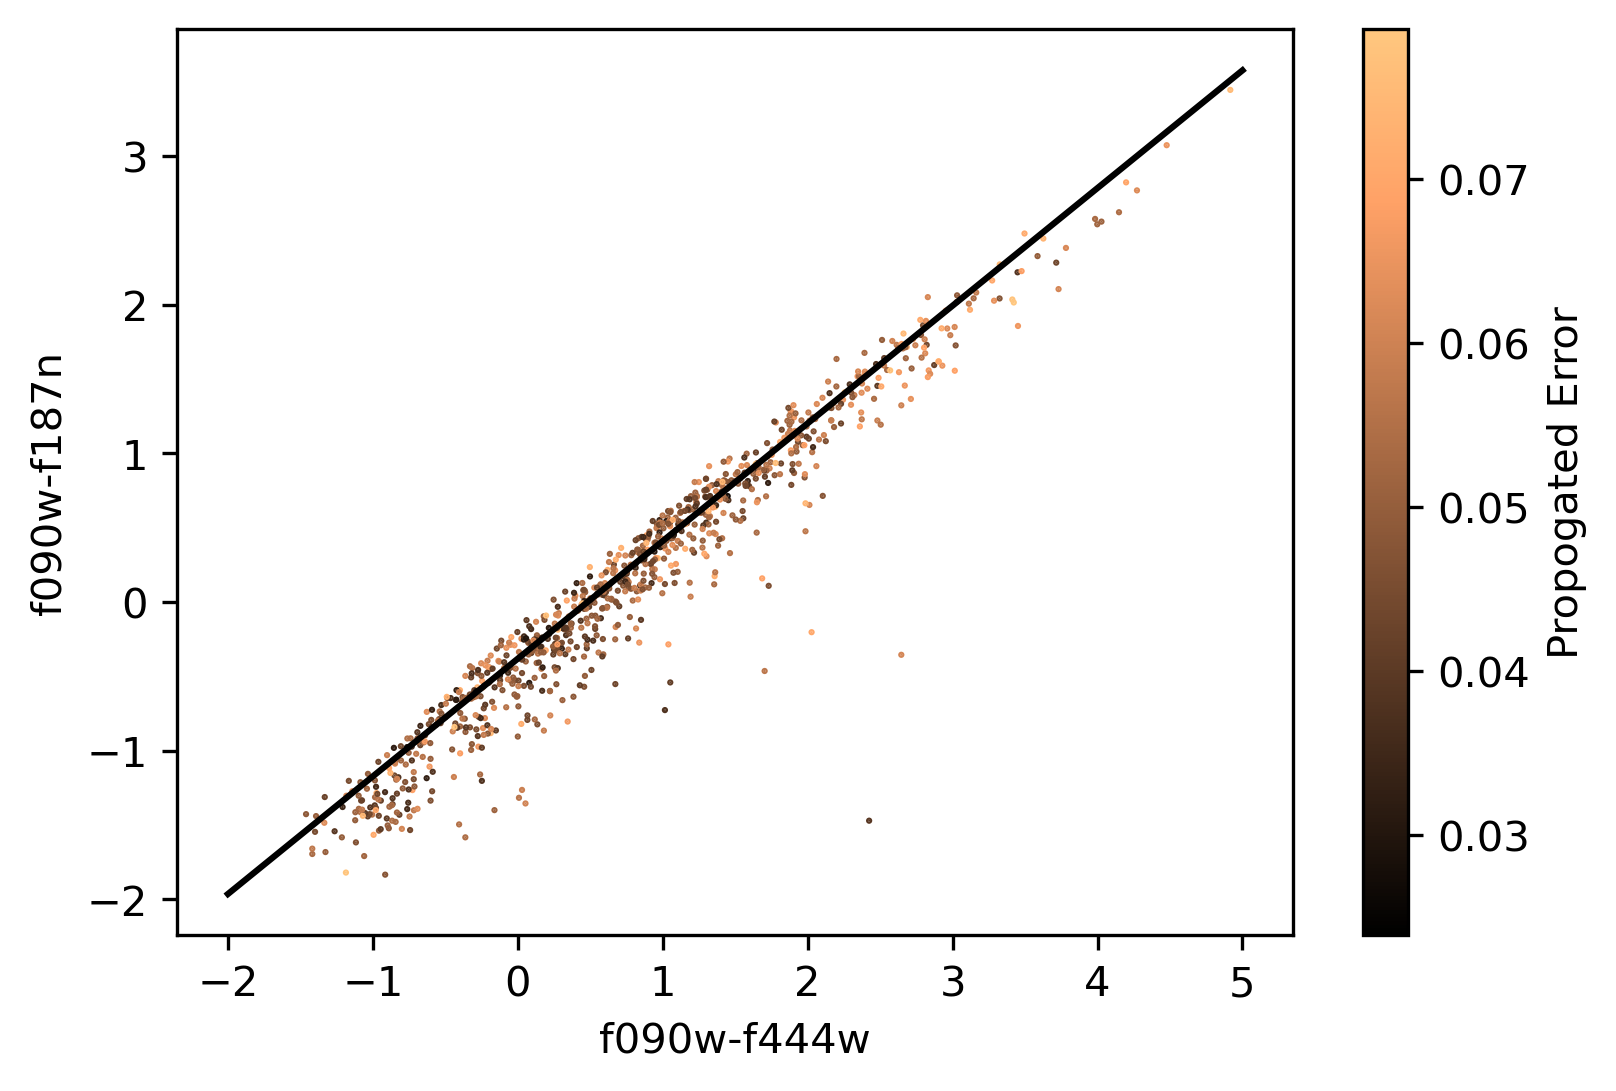

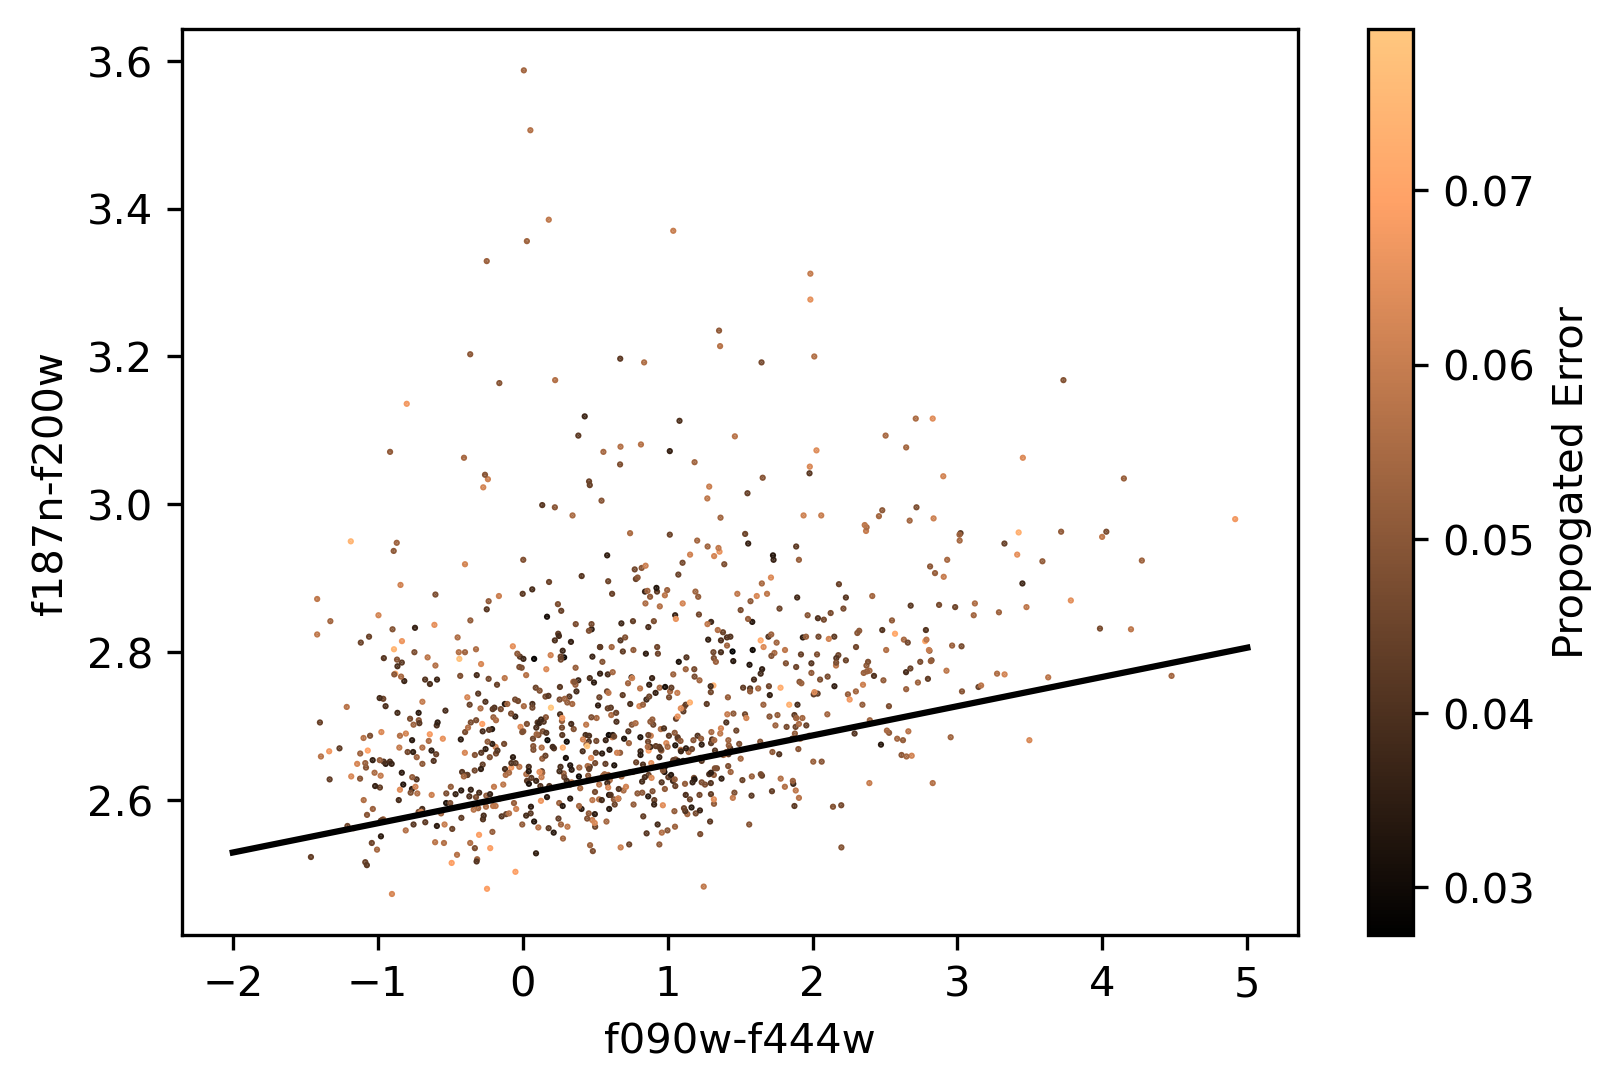

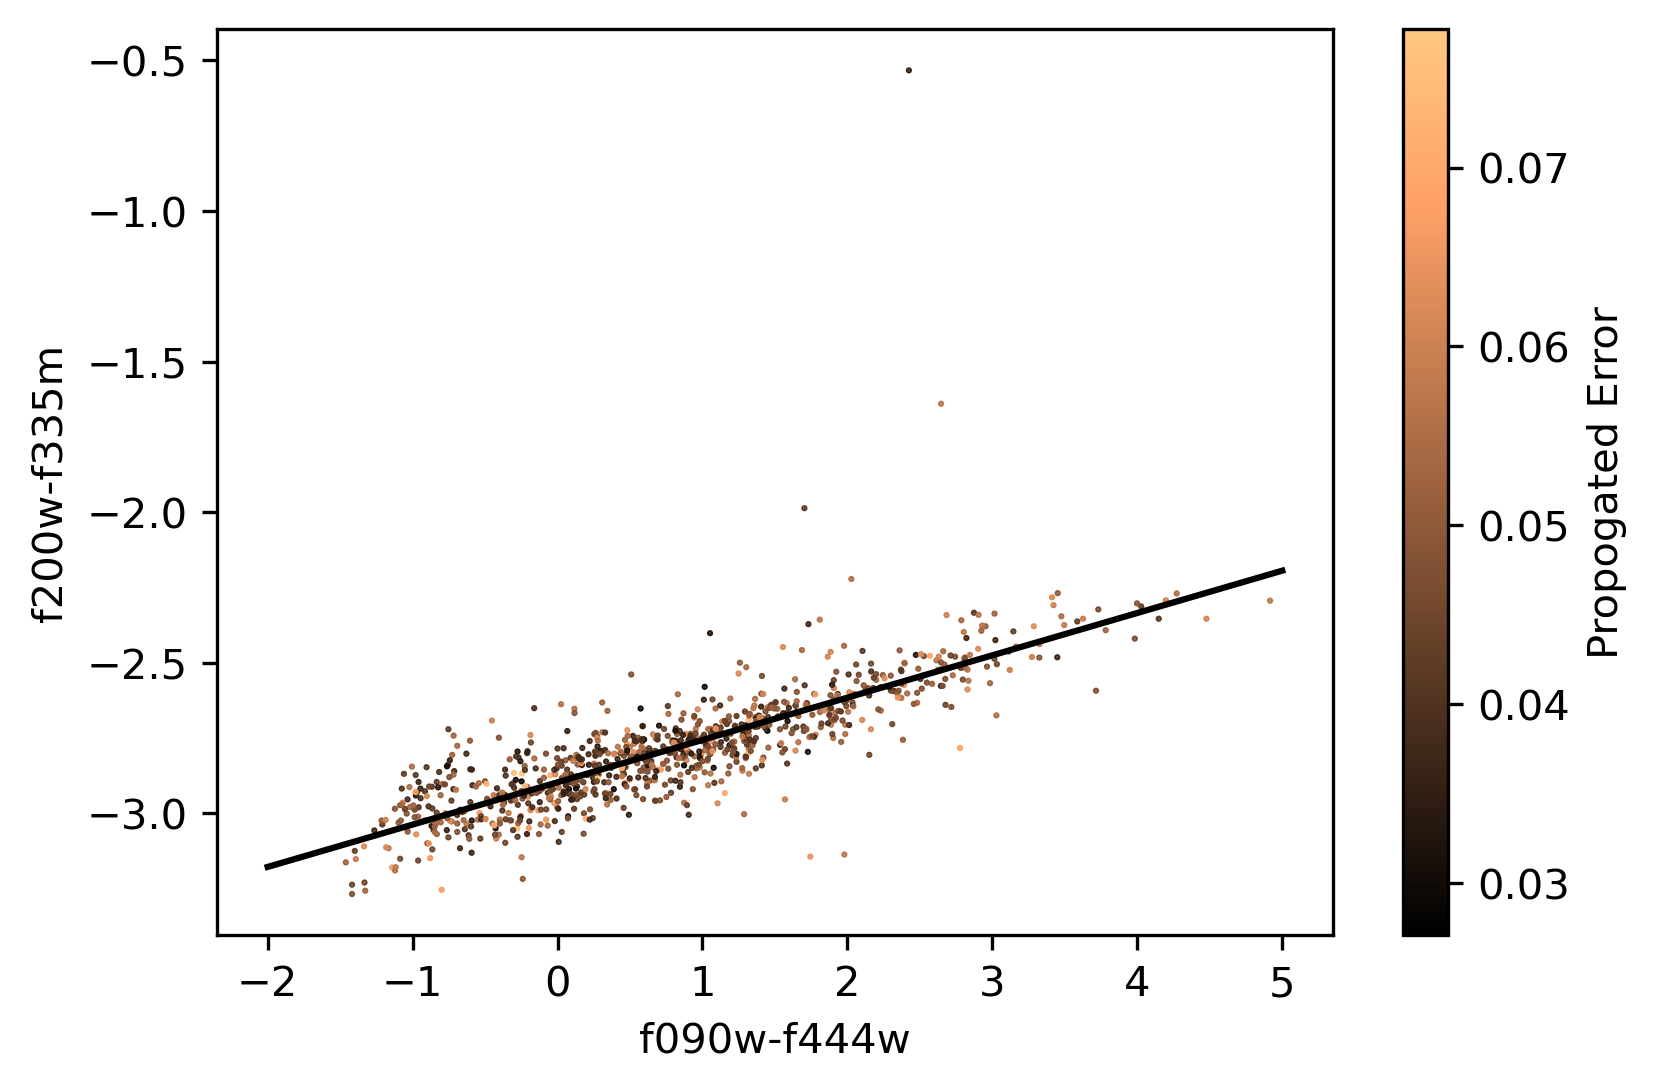

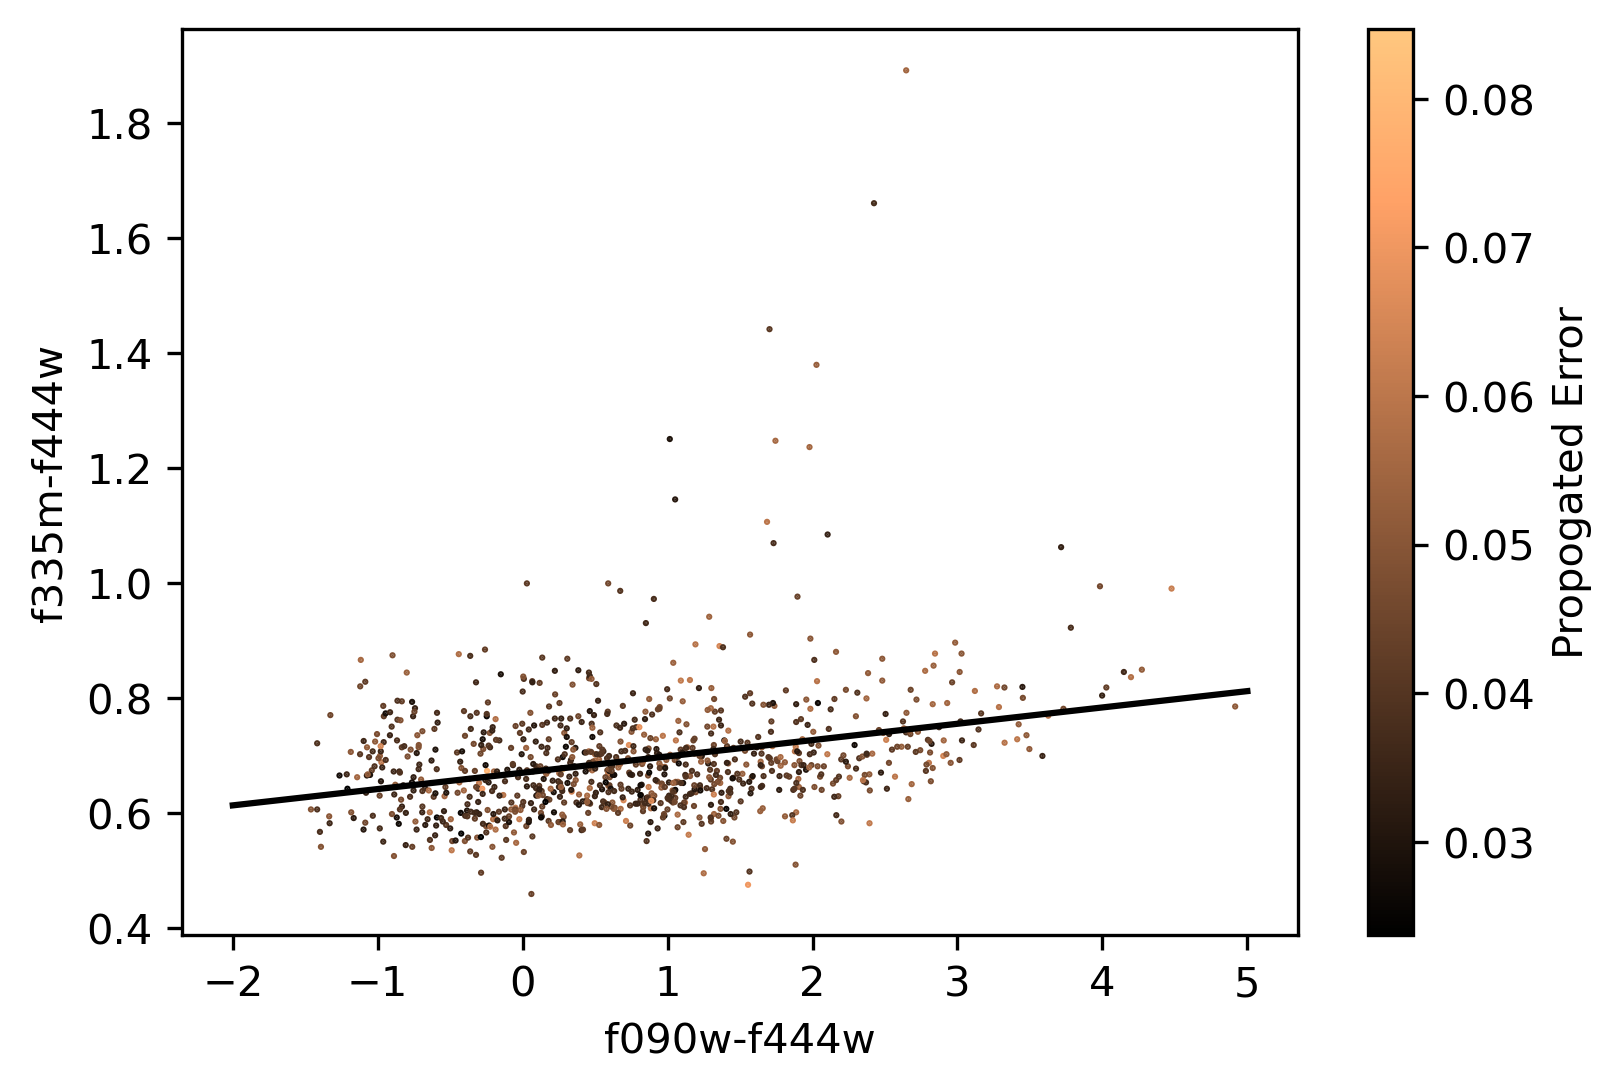

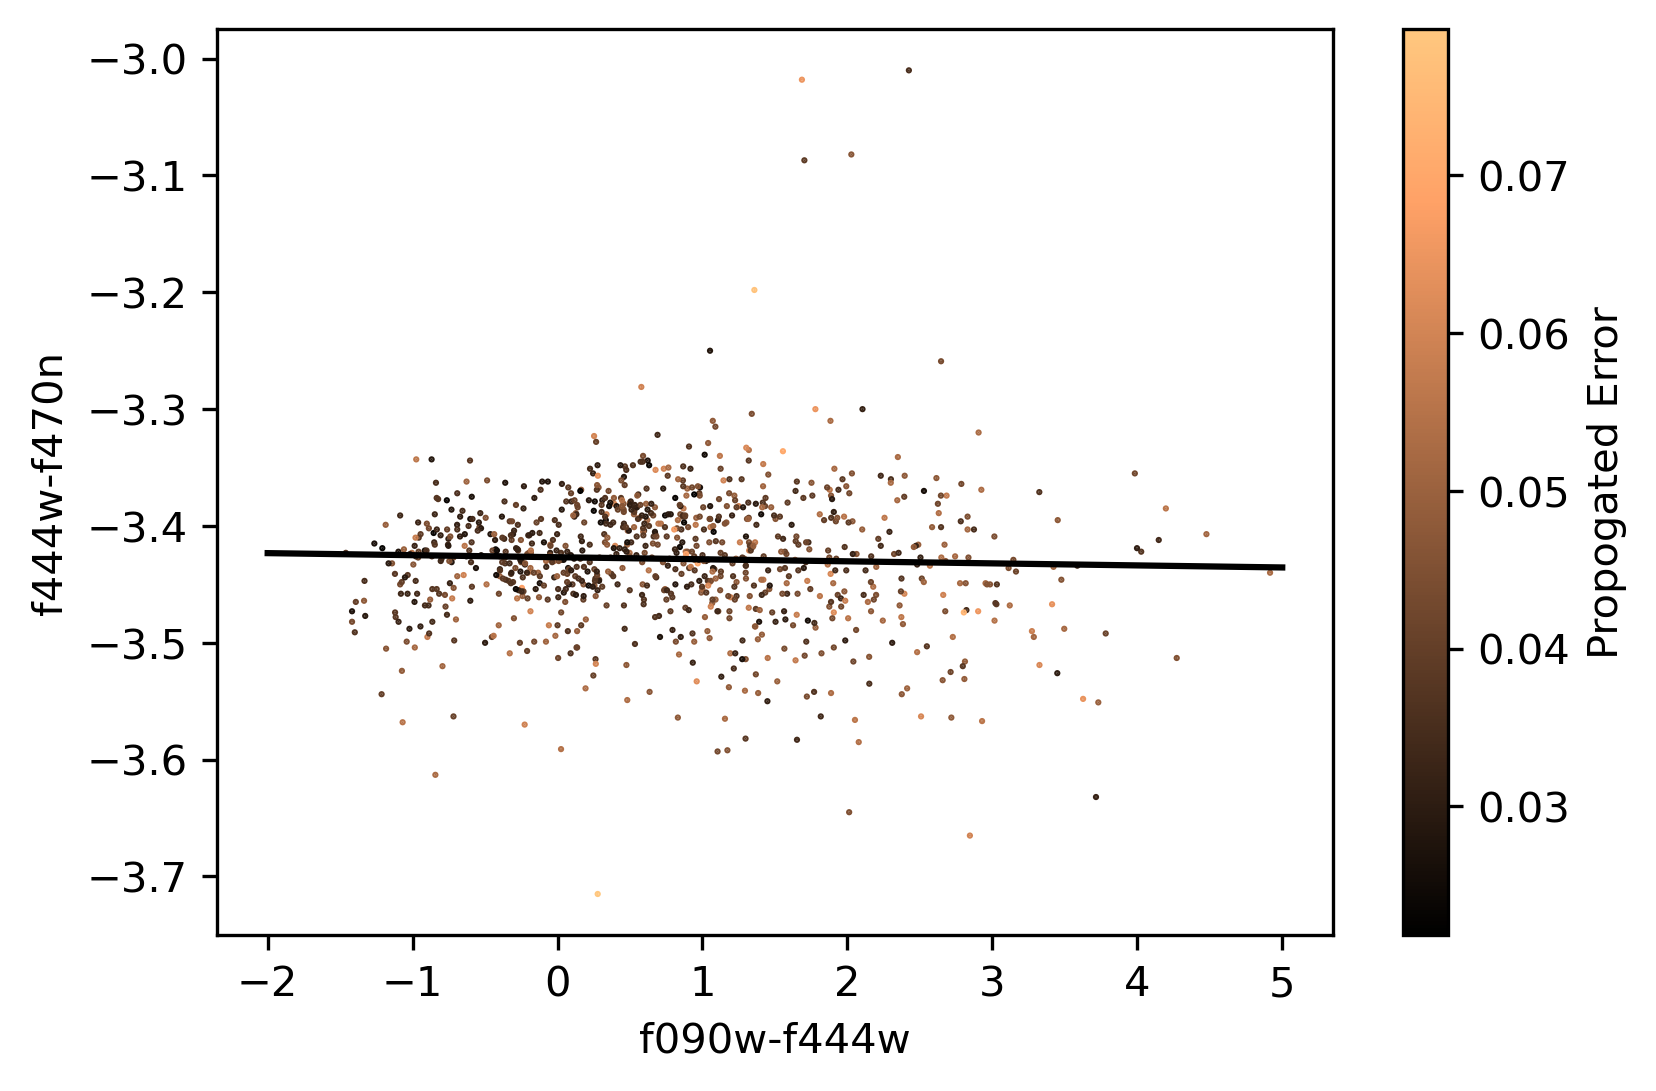

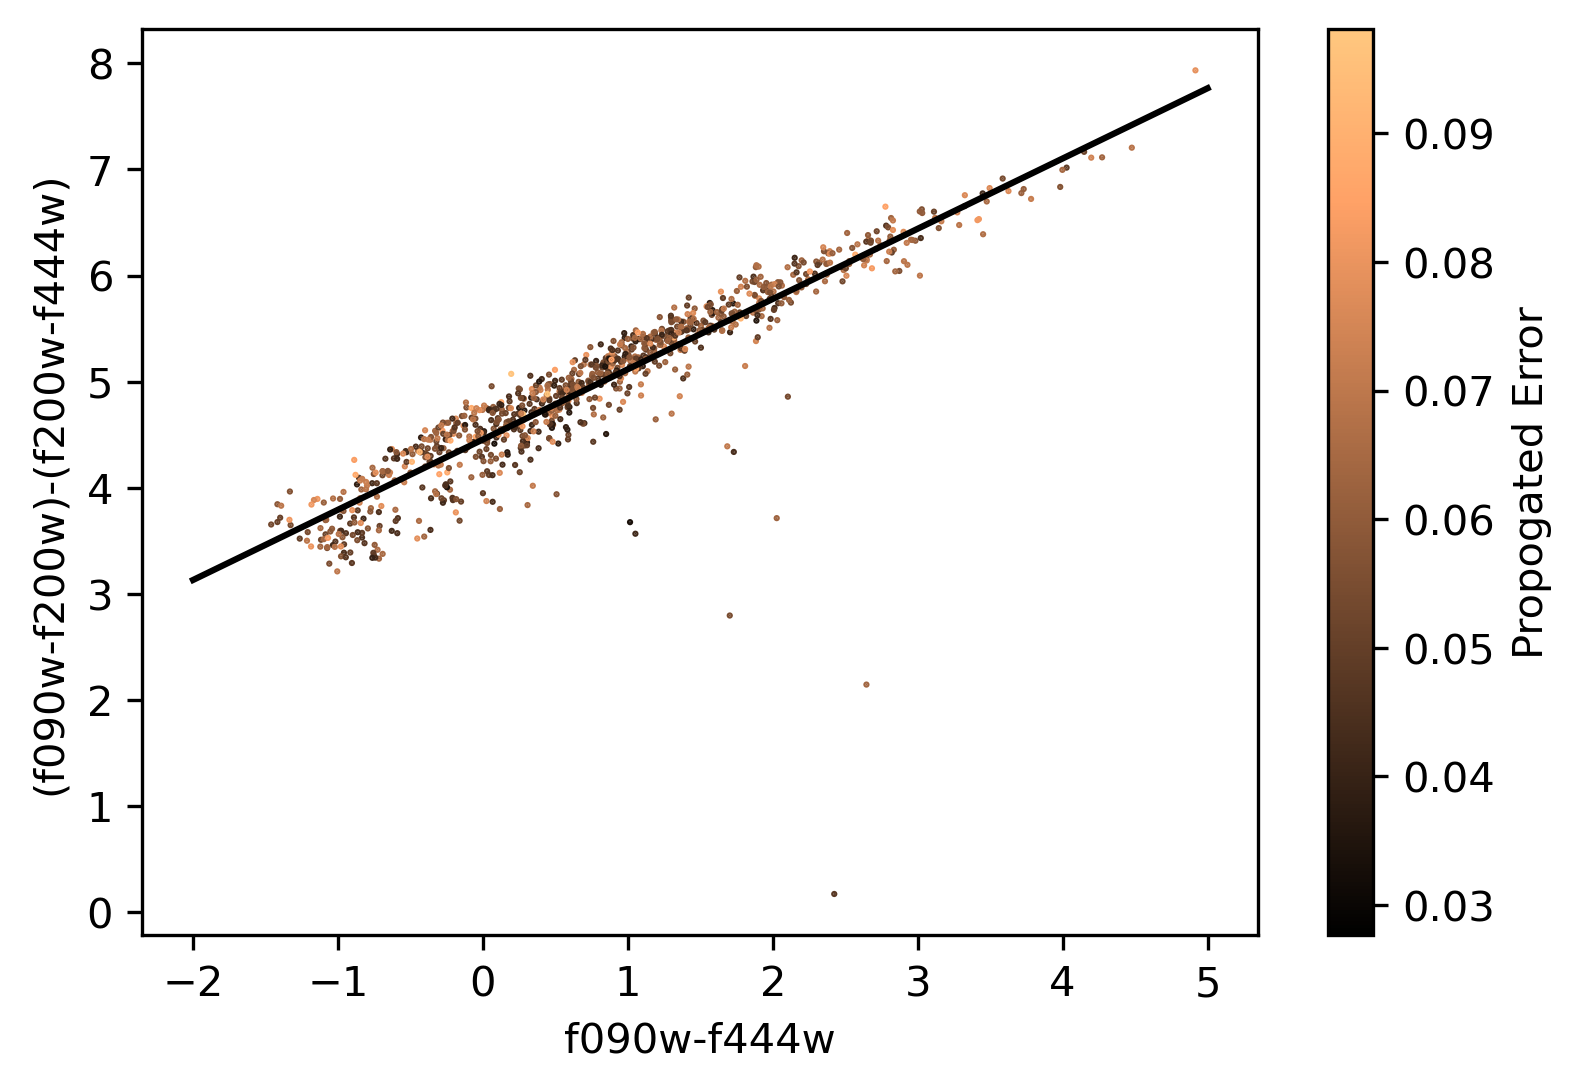

In [1079]:
dels = {}
dao_tmp = dao.copy()
for filt in filters:
    dao_tmp = dao_tmp[dao_tmp['e_'+filt]<0.05]
dels['f090w-f187n'], dels['e_f090w-f187n'] = delta('f090w','f444w','f090w','f187n',dao_tmp.copy(),adj=0.1)
# plt.close()
dels['f187n-f200w'], dels['e_f187n-f200w'] = delta('f090w','f444w','f187n','f200w',dao_tmp.copy(),adj=-0.1)
# plt.close()
dels['f200w-f335m'], dels['e_f200w-f335m'] = delta('f090w','f444w','f200w','f335m',dao_tmp.copy(),adj=0.)
# plt.close()
dels['f335m-f444w'], dels['e_f335m-f444w'] = delta('f090w','f444w','f335m','f444w',dao_tmp.copy(),adj=0)
# plt.close()
dels['f444w-f470n'], dels['e_f444w-f470n'] = delta('f090w','f444w','f444w','f470n',dao_tmp.copy(),adj=-0.0)
# plt.close()
dels['(f090w-f200w)-(f200w-f444w)'], dels['e_(f090w-f200w)-(f200w-f444w)'] = delta_broad('f090w','f444w','f090w','f200w','f200w','f444w',dao_tmp.copy(),adj=-0.0)
# plt.close()

In [1074]:
def delta_delta(xlabel,ylabel,deltas):
    plt.subplots(dpi=300)
    err = np.sqrt(deltas['e_'+xlabel]**2+deltas['e_'+ylabel]**2)
    plt.scatter(deltas[xlabel], deltas[ylabel],marker='.',c=err, s=1,cmap='copper')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.colorbar(label='Propogated Error')


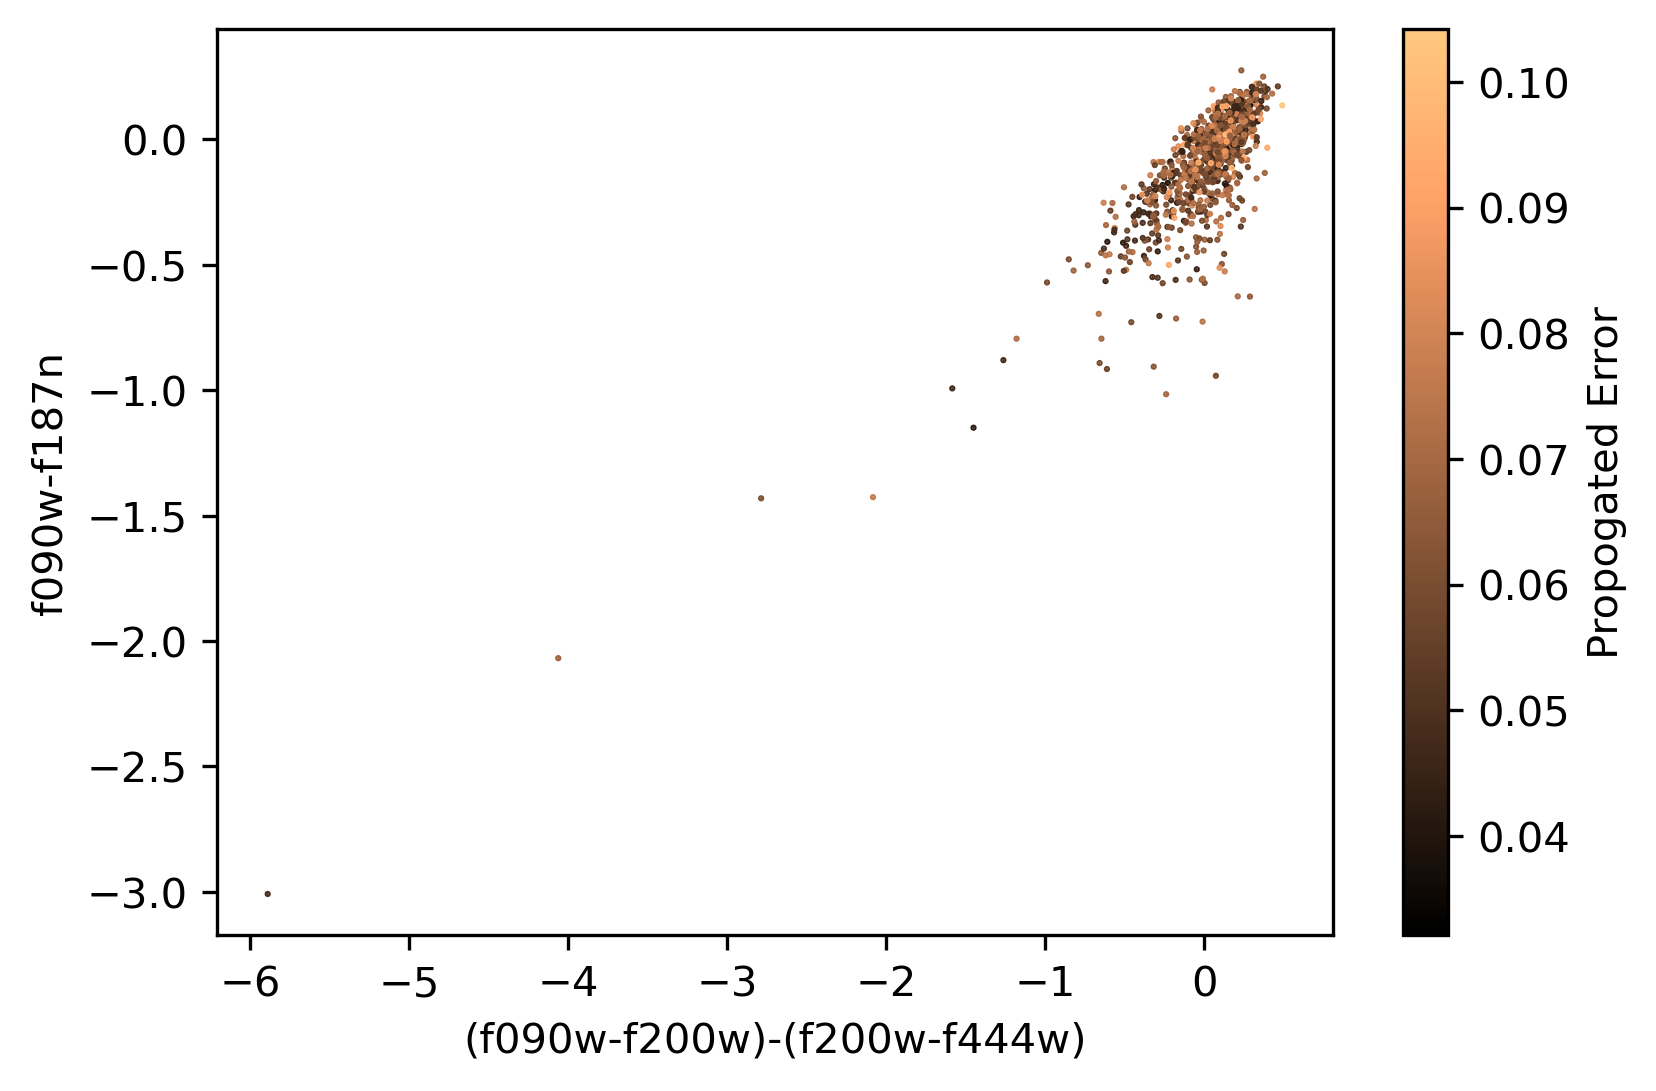

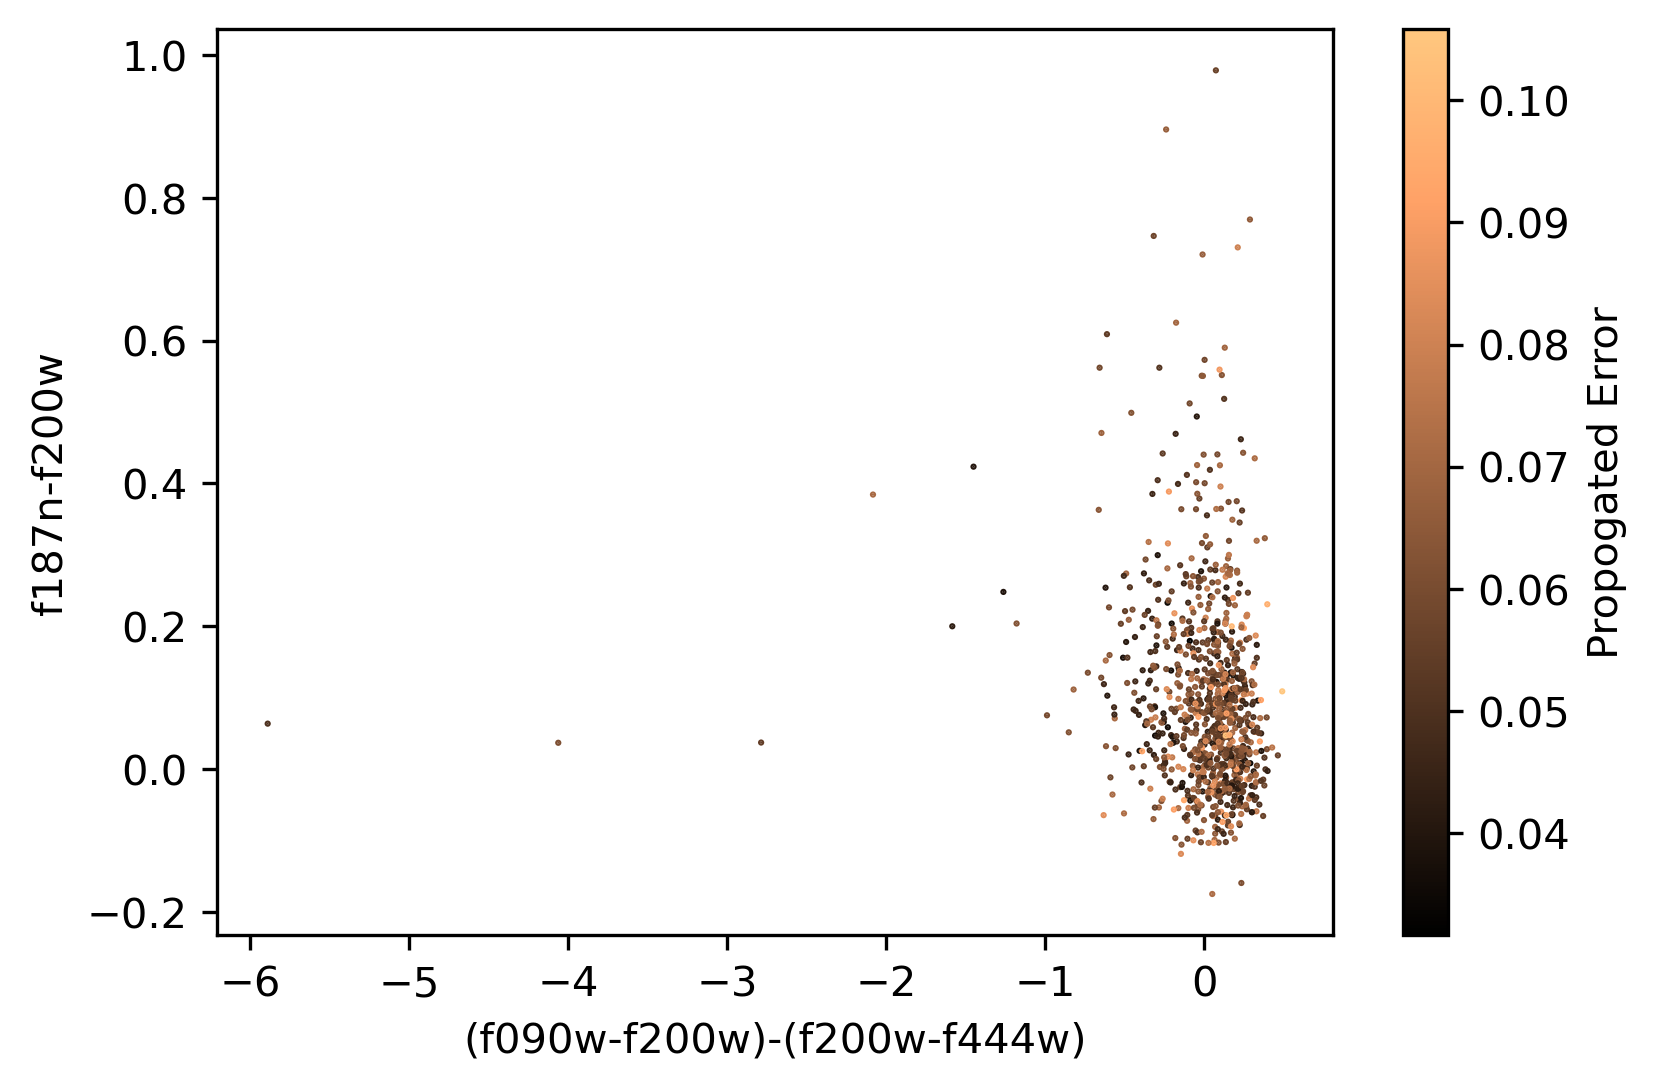

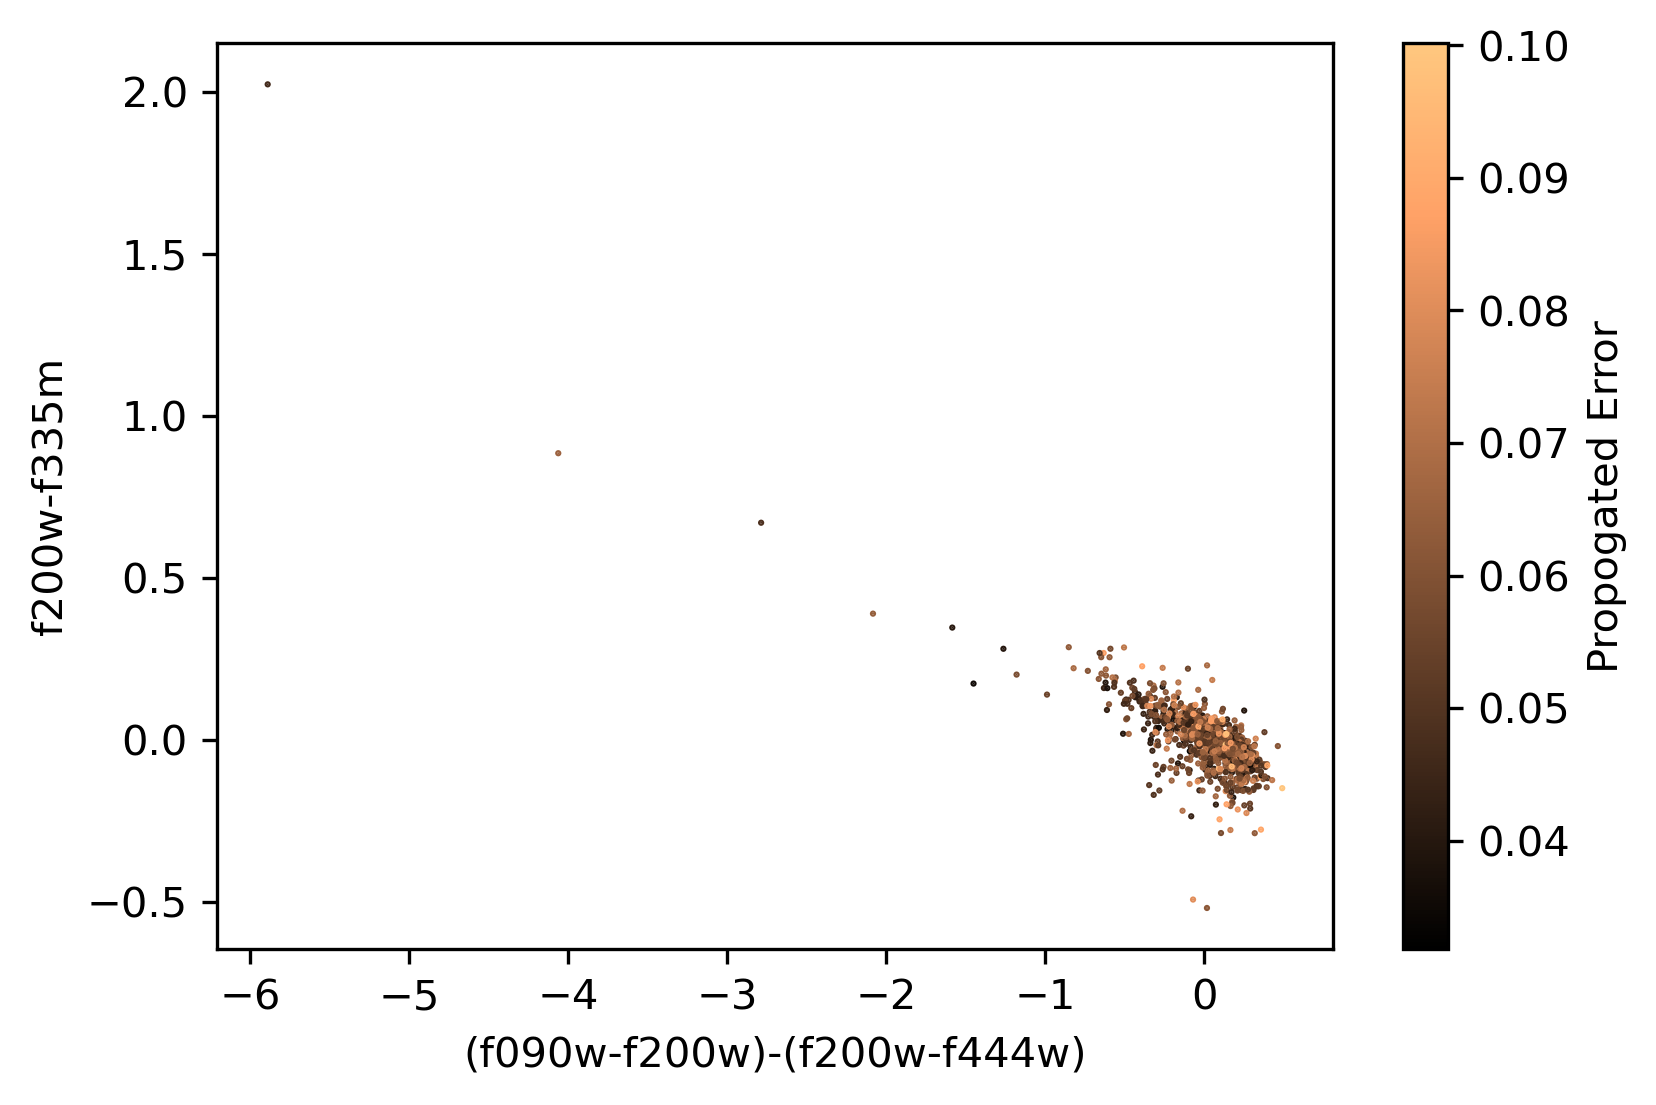

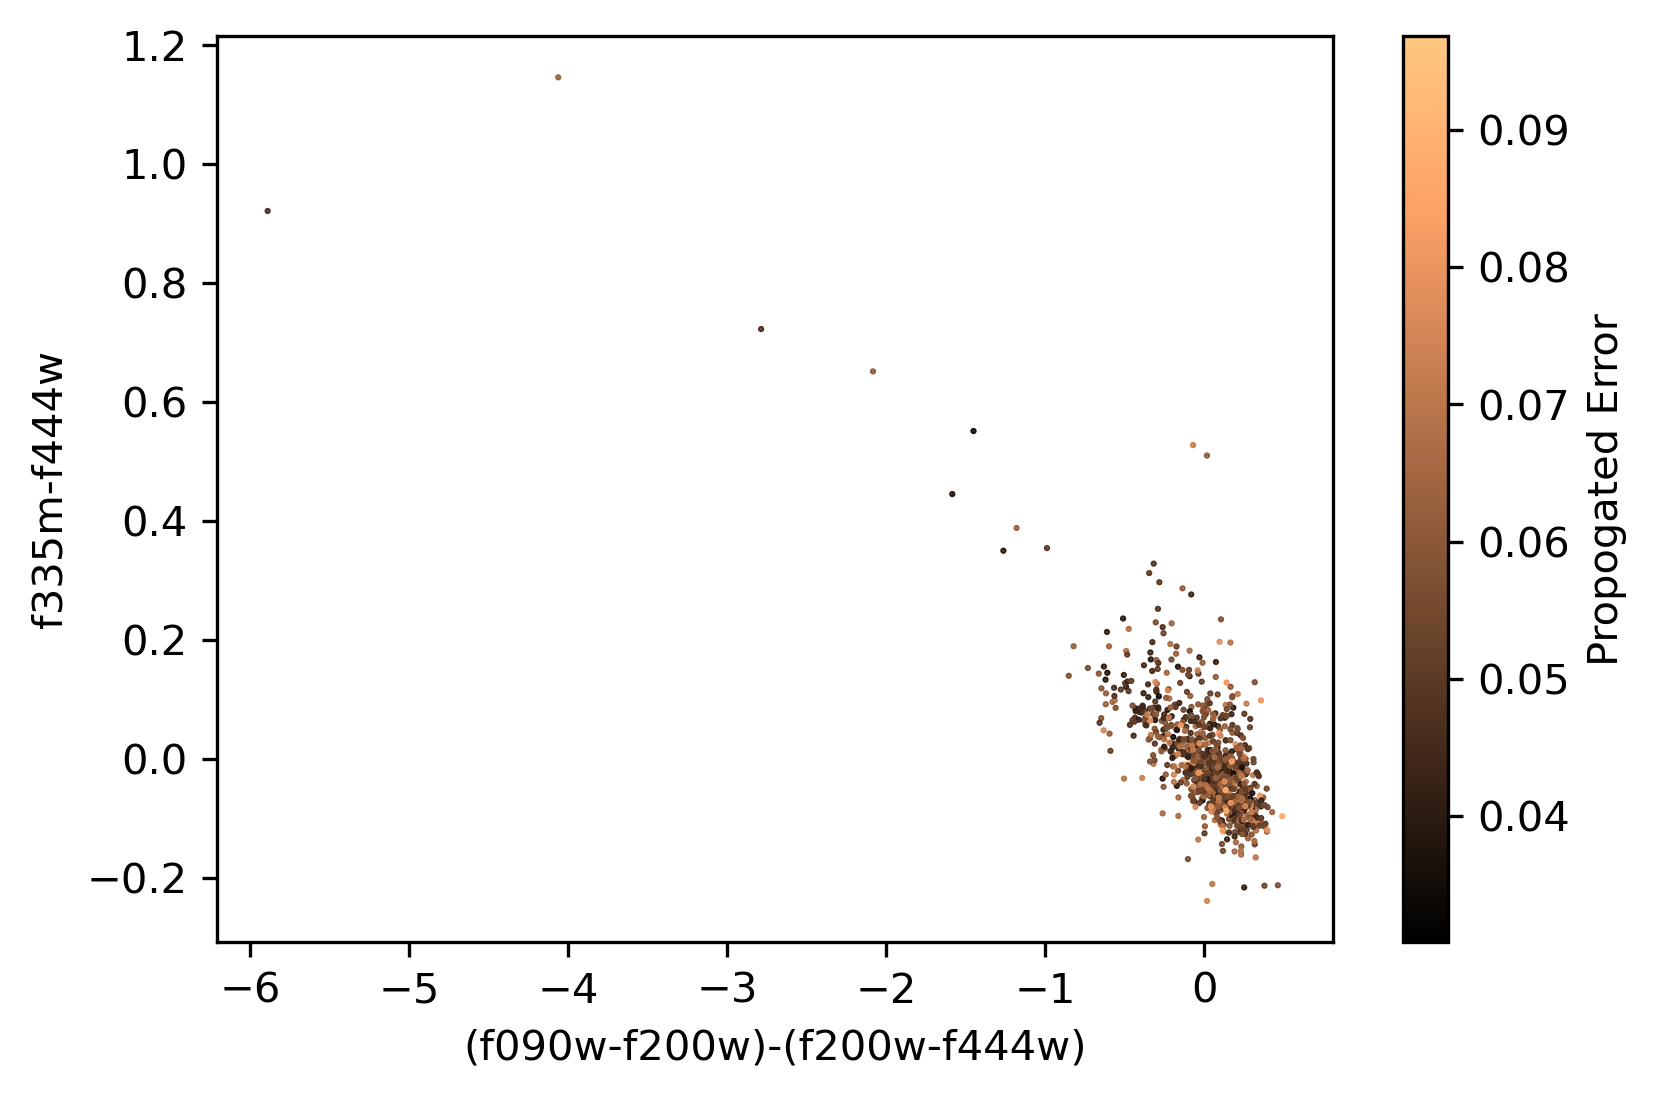

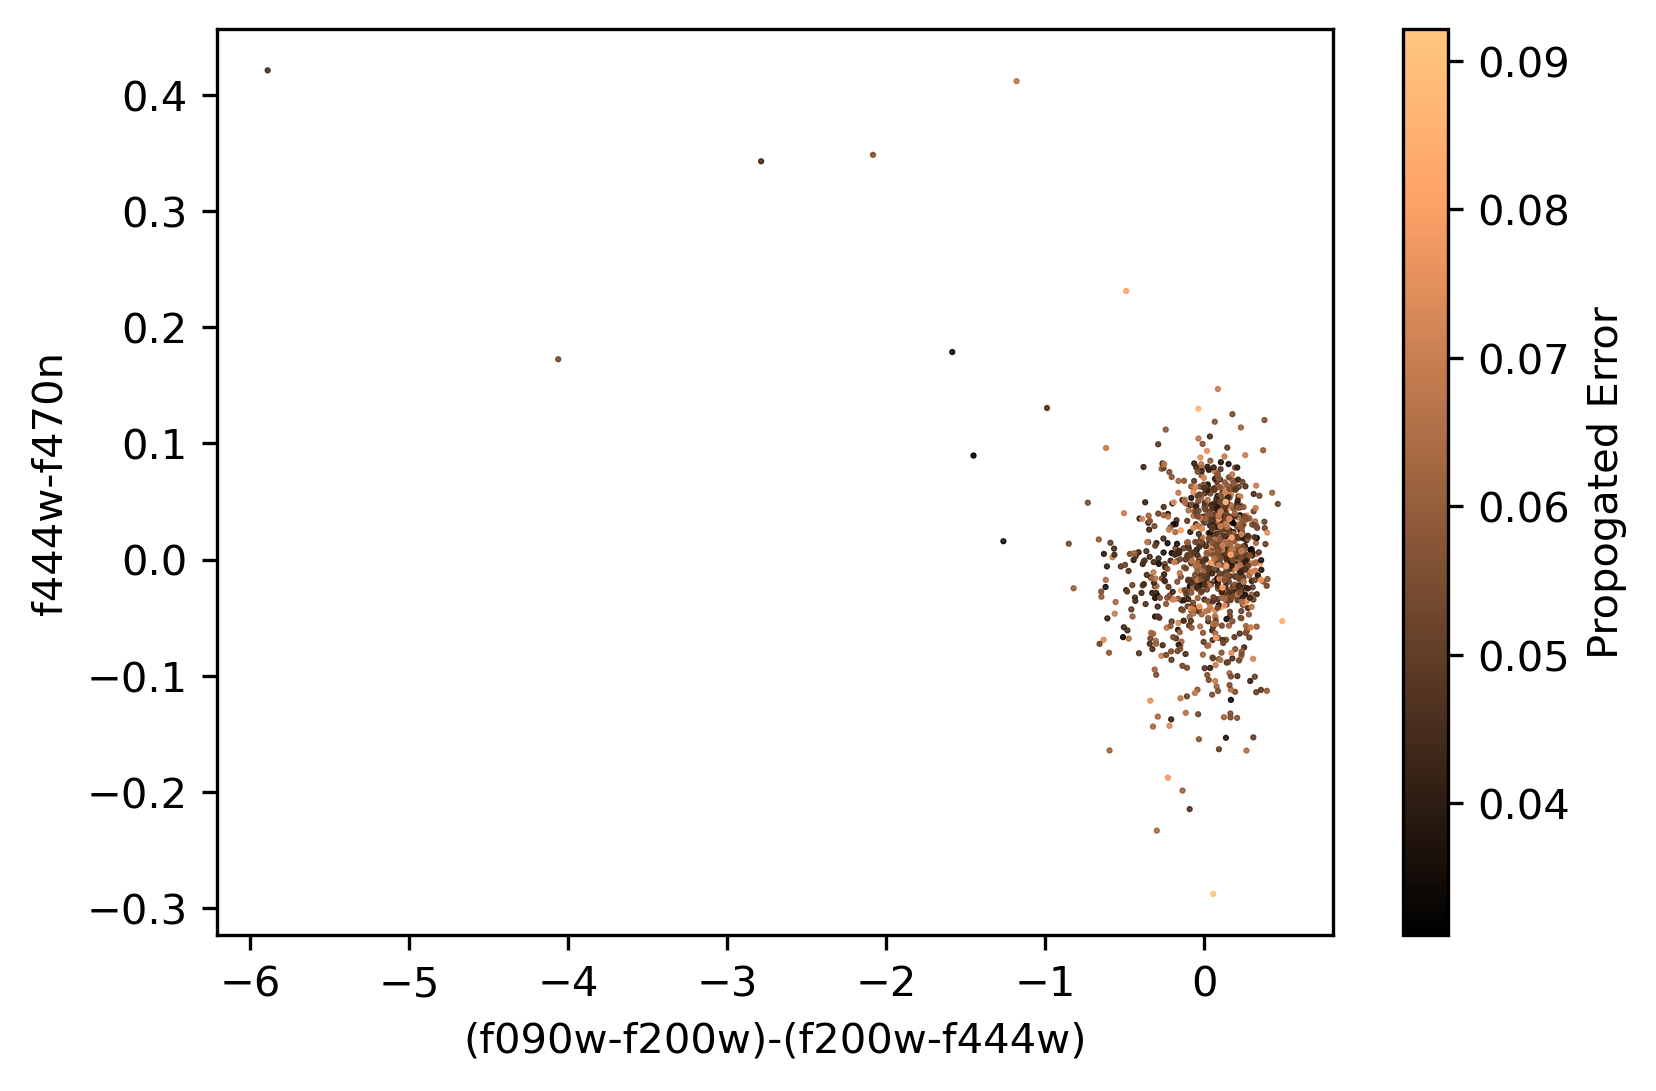

In [1075]:
delta_delta('(f090w-f200w)-(f200w-f444w)','f090w-f187n',dels)
delta_delta('(f090w-f200w)-(f200w-f444w)','f187n-f200w',dels)
delta_delta('(f090w-f200w)-(f200w-f444w)','f200w-f335m',dels)
delta_delta('(f090w-f200w)-(f200w-f444w)','f335m-f444w',dels)
delta_delta('(f090w-f200w)-(f200w-f444w)','f444w-f470n',dels)


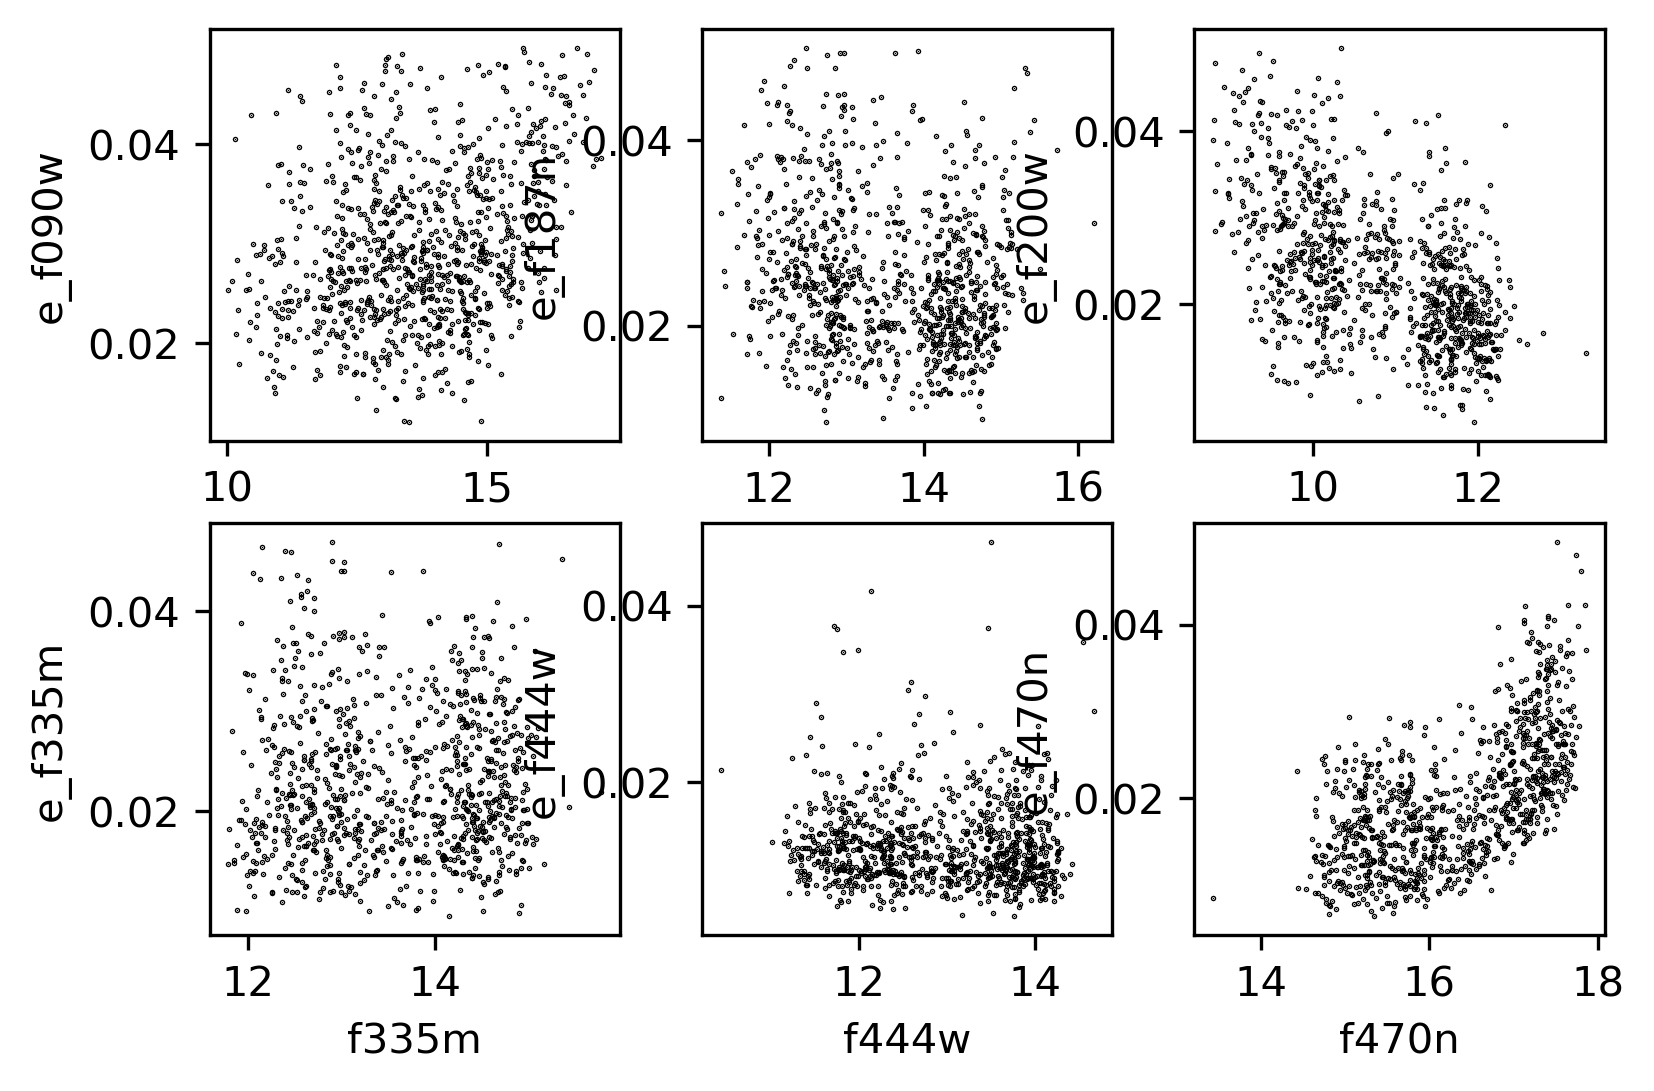

In [1080]:
fig,ax = plt.subplots(2,3,dpi=300)
i = j = 0
for filt in filters:
    ax[i][j].scatter(dao_tmp[filt],dao_tmp['e_'+filt],s=0.1,c='k')
    ax[i][j].set_xlabel(filt)
    ax[i][j].set_ylabel('e_'+filt)
    j += 1
    if j ==3:
        i =1
        j=0


# Check .coo output (roundness, sharpness, and sigma)

In [696]:
# filt = 'f335m'
# os.replace('/Users/breannacrompvoets/Documents/Star_Formation/YSO+Classification/Webb_PRF_Classification/temp.txt', f"/users/breannacrompvoets/DAOPHOT/NGC3324/{filt}_ADU.nei")


0


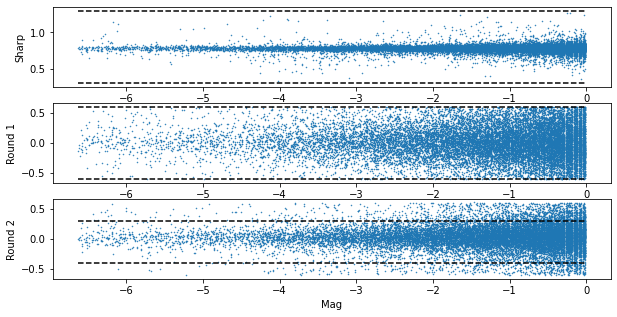

In [745]:
filt = 'f470n'

cols_coo = ['ID','x','y','Mag','Sharp','Round1', 'Round2']
dao_f = pd.read_csv(f"~/DAOPHOT/NGC3324/{filt}_ADU.coo", header=None,delim_whitespace=True, skiprows=3, names=cols_coo)
print(len(np.where(dao_f.Sharp==9.999)[0]))

fig, axs = plt.subplots(3,1,figsize = (10,5))
axs[0].plot(dao_f.Mag,dao_f.Sharp,'.',markersize=1)
axs[0].set_ylabel('Sharp')
axs[0].set_xlabel('Mag')
axs[0].hlines(1.3,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[0].hlines(0.3,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
# axs[0].set_ylim(-0.5,2)


axs[1].plot(dao_f.Mag,dao_f.Round1,'.',markersize=1)
axs[1].set_ylabel('Round 1')
axs[1].set_xlabel('Mag')
axs[1].hlines(0.6,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[1].hlines(-0.6,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
# axs[1].set_ylim(-1,2)


axs[2].plot(dao_f.Mag,dao_f.Round2,'.',markersize=1)
axs[2].set_ylabel('Round 2')
axs[2].set_xlabel('Mag')
axs[2].hlines(0.3,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[2].hlines(-0.4,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')

In [744]:
import os

with open(f"/users/breannacrompvoets/DAOPHOT/NGC3324/{filt}_ADU.coo", "r") as input:
    with open("temp.txt", "w") as output:
        # iterate all lines from file
        for line in input:
            # if substring contain in a line then don't write it
            if ("-9.999" not in line.strip("\n")) and ("9.999" not in line.strip("\n")):
                output.write(line)

# replace file with original name
os.replace('temp.txt', f"/users/breannacrompvoets/DAOPHOT/NGC3324/{filt}_ADU.coo")

# Check .als/.alf output

In [751]:
filt = 'f090w'
print(filt)
cols = ['ID','x','y','Mag','Sigma','Modal_sky','Num_it','Chi','Sharp']
dao_f = pd.read_csv(f"~/DAOPHOT/NGC3324/{filt}_ADU.als", header=None,delim_whitespace=True, skiprows=3, names=cols)
dao_f.head()

f090w


ID          x        y     Mag   Sigma  Modal_sky  Num_it    Chi  Sharp
0  12002   8737.621   73.174  16.672  0.0755     174.93     4.0  1.123  0.186
1   1927   1321.304   90.882  16.449  0.0741     148.62     4.0  1.336 -0.288
2  10867   7915.074   93.392  17.762  0.1268     177.08     4.0  0.813  0.231
3   9468   6970.871   99.276  18.066  0.1096     176.75     4.0  0.524  0.537
4  14651  10700.160  104.600  16.411  0.0434     178.25     4.0  0.745 -0.173

f187n
7.597153294829876
7.597153294829876


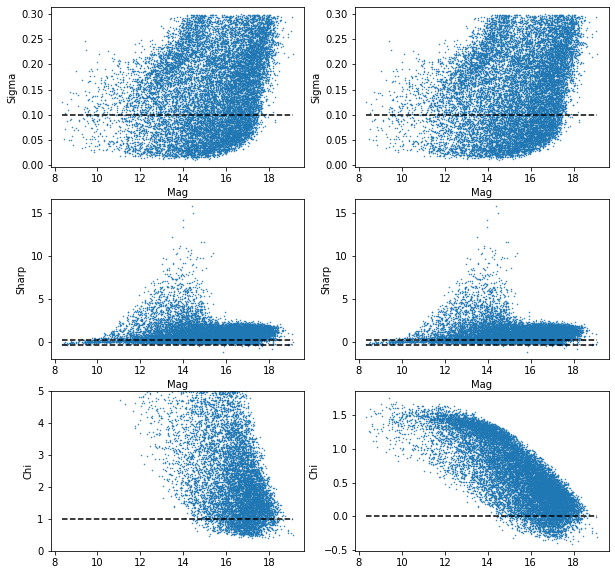

In [754]:
filt = 'f187n'
# filt = filters[q]
print(filt)
dao_f = pd.read_csv(f"/users/breannacrompvoets/DAOPHOT/NGC3324/{filt}_ADU.alf", header=None,delim_whitespace=True, skiprows=3, names=cols)

fig, axs = plt.subplots(3,2,figsize = (10,10))

axs[0][0].plot(dao_f.Mag,dao_f.Sigma,'.',markersize=1)
axs[0][0].set_ylabel('Sigma')
axs[0][0].set_xlabel('Mag')
axs[0][0].hlines(0.1,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[1][0].plot(dao_f.Mag,dao_f.Sharp,'.',markersize=1)
axs[1][0].set_ylabel('Sharp')
axs[1][0].set_xlabel('Mag')
axs[1][0].hlines(0.3,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[1][0].hlines(-0.3,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[2][0].plot(dao_f.Mag,dao_f.Chi,'.',markersize=1)
axs[2][0].hlines(1,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[2][0].set_ylabel('Chi')
axs[2][0].set_ylim(0,5)
print(np.mean(dao_f.Chi))


# dao_f = dao_f[dao_f.Sigma<0.1]
# dao_f = dao_f[dao_f.Sharp<0.3]
# dao_f = dao_f[dao_f.Sharp>-0.0]

axs[0][1].plot(dao_f.Mag,dao_f.Sigma,'.',markersize=1)
axs[0][1].set_ylabel('Sigma')
axs[0][1].set_xlabel('Mag')
axs[0][1].hlines(0.1,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[1][1].plot(dao_f.Mag,dao_f.Sharp,'.',markersize=1)
axs[1][1].set_ylabel('Sharp')
axs[1][1].set_xlabel('Mag')
axs[1][1].hlines(0.3,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[1][1].hlines(-0.3,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[2][1].plot(dao_f.Mag,np.log10(dao_f.Chi),'.',markersize=1)
axs[2][1].hlines(0,xmin=min(dao_f.Mag),xmax=max(dao_f.Mag),linestyles='--',colors='k')
axs[2][1].set_ylabel('Chi')
print(np.mean(dao_f.Chi))
q +=1
# plt.savefig('./Figures/run_1_allstar_f470n.png',dpi=300)

In [748]:

with open(f"/users/breannacrompvoets/DAOPHOT/NGC3324/{filt}_ADU.als", "r") as input:
    # print(input.readlines())
    with open("temp.txt", "w") as output:
        # iterate all lines from file
        for l, line in enumerate(input):
            # if substring contain in a line then don't write it
            if l < 3:
                output.write(line)
            else:
                if abs(dao_f.Sharp.iloc[l-3]) < 0.3:
                    if abs(dao_f.Sigma.iloc[l-3]) < 0.1:
                        output.write(line)
                        

# replace file with original name
os.replace('temp.txt', f"/users/breannacrompvoets/DAOPHOT/NGC3324/{filt}_ADU.als")

In [668]:
def changes_from_chi(dao_f):
    # cols = ['ID','x','y','Mag','Sigma','Modal_sky','Num_it','Chi','Sharp']
    # dao_f = pd.read_csv(f"/users/breannacrompvoets/DAOPHOT/NGC3324/{filt}_ADU.als", header=None,delim_whitespace=True, skiprows=3, names=cols)

    read = 1-np.mean(dao_f[dao_f.Mag<np.mean(dao_f.Mag)].Chi)
    gain = (1-np.mean(dao_f[dao_f.Mag>np.mean(dao_f.Mag)].Chi))**2

    return f"Read noise should be: {read} and gain should be {gain}."

In [750]:
changes_from_chi(dao_f)

'Read noise should be: -0.6147859140605145 and gain should be 0.06822084245849004.'

# Find good threshold

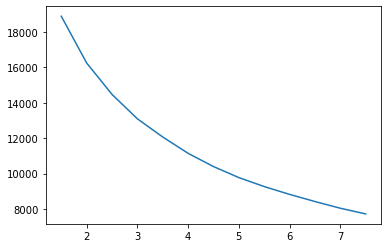

In [200]:
thresh = np.arange(1.5,8,0.5)
numstars = [18885,16246,14473,13096,12068,11147,10400,9778,9271,8830,8427,8048,7727]#[11392,9426,8107,7146,6442,5845,5377,4989,4694,4345,4094,3908]#[7183, 6180, 5487, 4993, 4593, 4278, 4038, 3849, 3650, 3462, 3324, 3179,3054, 2943]
plt.plot(thresh,numstars)

# Change FITS files to short ints in ADU

In [734]:
filt

'f470n'

In [738]:
for filt in [filt]:#filters:
    hdu = fits.open(f'/users/breannacrompvoets/DAOPHOT/NGC3324/RESULTS_MJYSR/{filt}.fits')
    data = hdu[0].data
    
# Convert fits files to units of DN from Mjy/sr
    print(hdu[0].header['PHOTMJSR'])
    data = np.short(data*hdu[0].header['XPOSURE']/(hdu[0].header['PHOTMJSR']*31.89)) # 31.89 is an empirical constant derived by setting the previous saturation limit found in the image to 32767, or the maximum of a shortint
    data[np.where(data<10)] = 32767 # Set any pixels with values low enough to be bad to the saturated pixel amount so that they are not counted in daophot
    hdr = hdu[0].header
    hdr['BUNIT'] = 'ADU'

# Save to new fits files
    fits.writeto(f'/users/breannacrompvoets/DAOPHOT/NGC3324/{filt}_ADU.fits', data, hdr,overwrite=True)

13.87049961090088


In [739]:
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 7047                                                  
NAXIS2  =                 4167                                                  
EXTNAME = 'SCI     '           / extension name                                 
MJD-BEG =    59733.37547690324 / [d] exposure start time in MJD                 
MJD-AVG =    59733.48862297418 / [d] exposure mid-point in MJD                  
MJD-END =    59733.60158211806 / [d] exposure end time in MJD                   
TDB-BEG =    59733.38083258623 / [d] TDB time of exposure start in MJD          
TDB-MID =    59733.49397739384 / [d] TDB time of exposure mid-point in MJD      
TDB-END =    59733.60693526757 / [d] TDB time of exposure end in MJD            
XPOSURE =             11595.

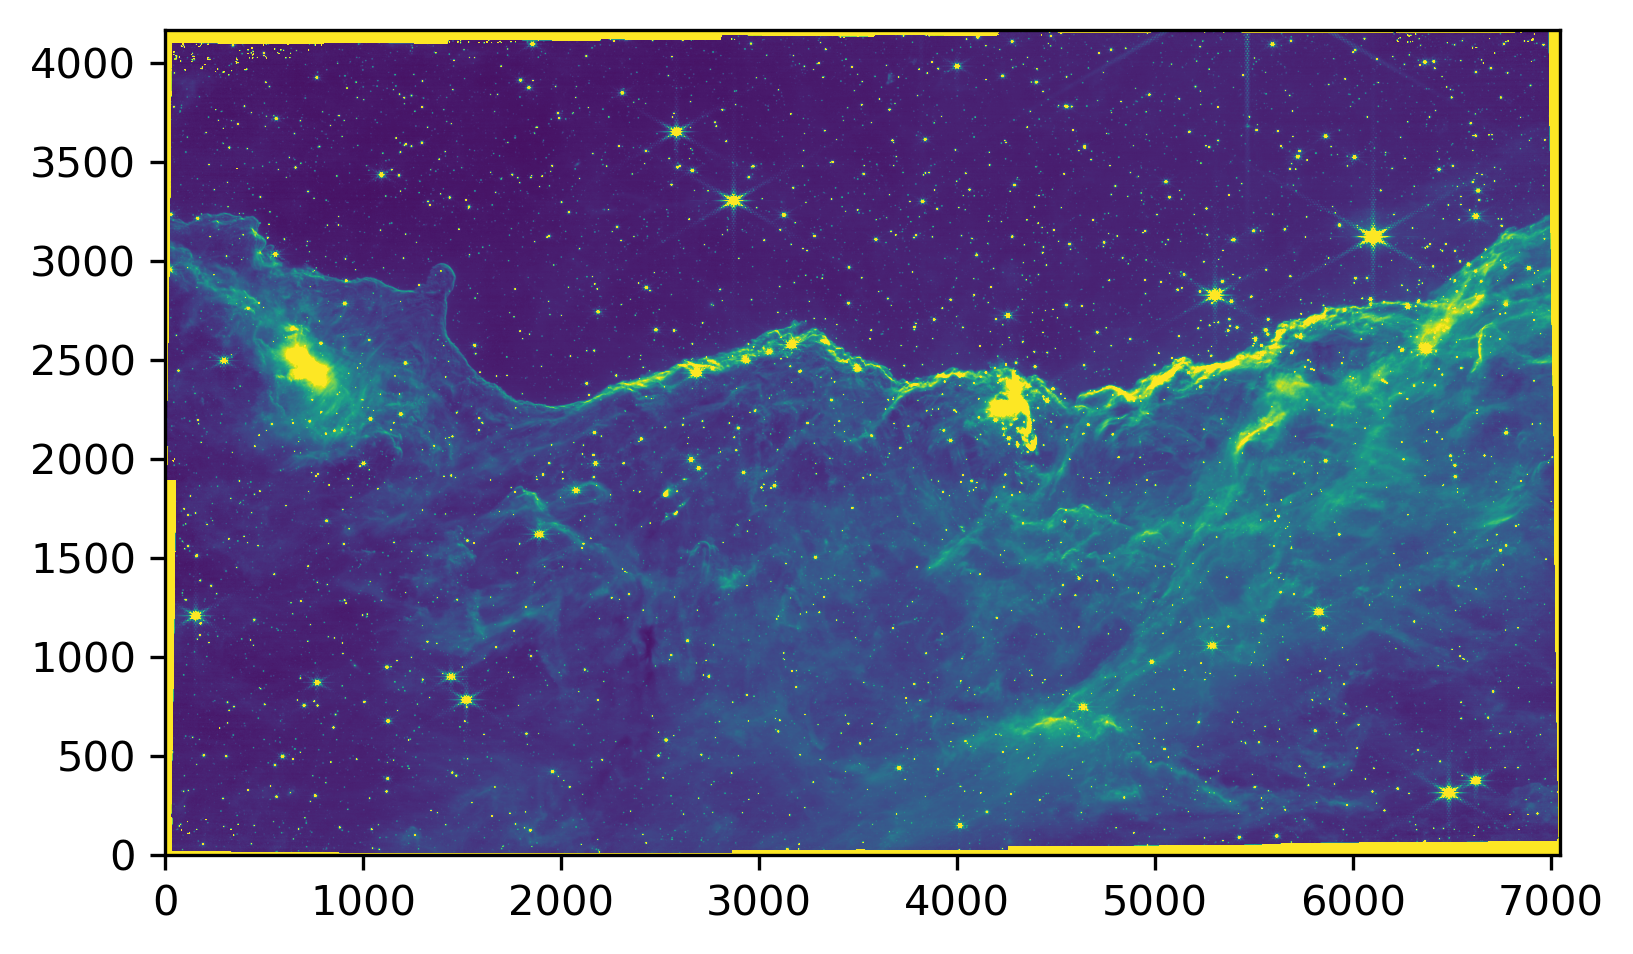

In [742]:
# filt = 'f090w'
data = fits.open(f'/users/breannacrompvoets/DAOPHOT/NGC3324/{filt}_ADU.fits')[0].data
plt.subplots(dpi=300)
plt.imshow(data,vmax=400,origin='lower')
plt.plot(dao_f.iloc[np.where(dao_f.Sharp==9.999)[0]].x,dao_f.iloc[np.where(dao_f.Sharp==9.999)[0]].y,'.',markersize=0.5)

In [167]:
print(len(np.where(dao_f.Sharp==9.999)[0]))
print(len(dao_f.Sharp))

2208
236658


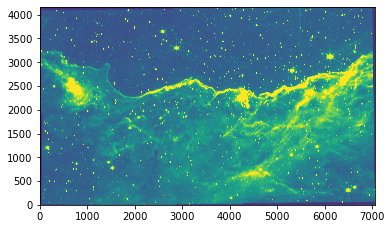

In [102]:
plt.imshow(hdu[0].data,vmax=10,origin='lower')

In [113]:
data

array([[32767., 32767., 32767., ..., 32767., 32767., 32767.],
       [32767., 32767., 32767., ..., 32767., 32767., 32767.],
       [32767., 32767., 32767., ..., 32767., 32767., 32767.],
       ...,
       [32767., 32767., 32767., ..., 32767., 32767., 32767.],
       [32767., 32767., 32767., ..., 32767., 32767., 32767.],
       [32767., 32767., 32767., ..., 32767., 32767., 32767.]],
      dtype=float32)

In [ ]:
# def proc_coo(filt):
#     cols_coo = ['ID','x','y','Mag','Sharp','Round1', 'Round2']
#     dao_f = pd.read_csv(f"~/DAOPHOT/NGC3324/{filt}_ADU.coo", header=None,delim_whitespace=True, skiprows=3, names=cols_coo)
#     dao_f

9237.766


/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_5189/3277491043.py:7: RuntimeWarning: invalid value encountered in power
  data = (data*hdu[0].header['XPOSURE']/(hdu[0].header['PHOTMJSR']))**(1/2.9)


(100.0, 1000.0)

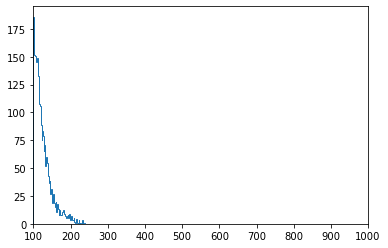

In [729]:

hdu = fits.open(f'/users/breannacrompvoets/DAOPHOT/NGC3324/RESULTS_MJYSR/{filt}.fits')
data = hdu[0].data

# Convert fits files to units of DN from Mjy/sr
# print(hdu[0].header['PHOTMJSR'])
print(max(data.ravel()))
data = (data*hdu[0].header['XPOSURE']/(hdu[0].header['PHOTMJSR']))**(1/2.9)
plt.hist(data.ravel(),histtype='step',bins=range(100,1000,2))
# plt.yscale('log')
# plt.xscale('log')
plt.xlim(100,1000)
# plt.vlines(32767,color='k',ymin=0,ymax=10000)
# plt.vlines(40,ymin=0,ymax=1000color='k',)
# plt.vlines(50,ymin=0,ymax=1000color='k',)
# plt.vlines(60,ymin=0,ymax=1000color='k',)

In [733]:
100**2.9/19

33208.28128843121

In [247]:
5192.3354*hdu[0].header['XPOSURE']/(hdu[0].header['PHOTMJSR'])

45293757.720822595

# Find Zero Points

Plot apparent magnitude versus 1/aperature radius. As aperatures get really big, magnitude should reach a steady point.

In [1163]:
head = ['ID', 'x', 'y', 'mag_1','mag_2','mag_3','mag_4','mag_5','mag_6','mag_7','mag_8','mag_9','mag_10','mag_11','mag_12']
ap_test = pd.read_csv("~/DAOPHOT/NGC3324/f187n_zp.ap", header=None,delim_whitespace=True, skiprows=3, names=head).iloc[::2, :]
# rads = [1/r for r in [1.5,1.8,2.2,2.7,3.3,4.0,4.8,5.7,6.7,7.8,9.0,10.3]]
# rads = [1/r for r in [1.5,2.5,4.5,6.5,8.5,10.5,12.5,14.5,16.5,18.5,20.5,22.5]]

ap_test.where(ap_test!=99.999, np.nan,inplace=True)
ap_test.where(ap_test!=-99.999, np.nan,inplace=True)
rads = [r for r in [1,3,6,9,12,15,18,21,24,27,30,35]]
ap_test

ID          x         y   mag_1   mag_2   mag_3   mag_4   mag_5  \
0    19379.0  14151.450  4167.149  12.670  11.537  11.346  11.281  11.251   
2    26178.0  13958.110  5557.612  12.668  11.641  11.449  11.388  11.363   
4    14935.0   9713.428  3117.286  12.624  11.662  11.456  11.392  11.363   
6    39969.0   1642.652  7589.280  12.658  11.643  11.461  11.403  11.378   
8    37767.0   2002.686  7249.993  12.731  11.658  11.463  11.404  11.380   
..       ...        ...       ...     ...     ...     ...     ...     ...   
212   2019.0    650.294   476.556  13.096  12.129  11.936  11.880  11.861   
214  35402.0   3256.267  6905.653  13.106  12.123  11.937  11.880  11.857   
216   7803.0  10202.220  1597.483  13.015  12.159  11.948  11.881  11.851   
218   8768.0   2493.219  1746.704  13.231  12.176  11.956  11.895  11.869   
220   8956.0   3960.554  1775.438  13.227  12.206  11.956  11.881  11.848   

      mag_6   mag_7   mag_8   mag_9  mag_10  mag_11  mag_12  
0    11.234  11.223  11.221  11.220  11.219  11.220  11.220  
2    11.348  11.343  11.344  11.355  11.374  11.382  11.393  
4    11.343  11.333  11.333  11.336  11.341  11.343  11.345  
6    11.363  11.355  11.355  11.357  11.361  11.365  11.366  
8    11.368  11.361  11.360  11.364  11.372  11.376  11.377  
..      ...     ...     ...     ...     ...     ...     ...  
212  11.854  11.843  11.837  11.840  11.843  11.842  11.844  
214  11.848  11.843  11.845  11.841  11.821  11.802  11.800  
216  11.840  11.834  11.832  11.837  11.843  11.836  11.834  
218  11.859  11.852  11.848  11.847  11.843  11.841  11.839  
220  11.833  11.827  11.829  11.824  11.828  11.835  11.841  

[111 rows x 15 columns]

In [1228]:
print("Min ",np.min(ap_test.mag_11),' Mean ',np.mean(ap_test.mag_11),' Max ',np.max(ap_test.mag_11))
plt.subplots(dpi=300)
plt.plot([rads]*len(ap_test), ap_test[['mag_1','mag_2','mag_3','mag_4','mag_5','mag_6','mag_7','mag_8','mag_9','mag_10','mag_11','mag_12']].values,'.',markersize=1.5)
plt.hlines(np.min(ap_test.mag_11),xmin=0,xmax=35,alpha=0.5,color='k')
plt.ylim(14,11)
plt.close()

Min  11.22  Mean  11.624327272727273  Max  11.848


In [373]:
i = 0

In [1229]:
head = ['ID', 'x', 'y', 'mag_1','mag_2','mag_3','mag_4','mag_5','mag_6','mag_7','mag_8','mag_9','mag_10','mag_11','mag_12']

ap_test = pd.read_csv("~/DAOPHOT/NGC3324/RESULTS_MJYSR/"+filt+"_zp_jy.ap", header=None,delim_whitespace=True, skiprows=3, names=head).iloc[::2, :]
# rads = [1/r for r in [1.5,1.8,2.2,2.7,3.3,4.0,4.8,5.7,6.7,7.8,9.0,10.3]]
# rads = [1/r for r in [1.5,2.5,4.5,6.5,8.5,10.5,12.5,14.5,16.5,18.5,20.5,22.5]]

ap_test.where(ap_test!=99.999, np.nan,inplace=True)
ap_test.where(ap_test!=-99.999, np.nan,inplace=True)
rads = [r for r in [1,3,6,9,12,15,18,21,24,27,30,35]]
# ap_test
print("Min ",np.min(ap_test.mag_11),' Mean ',np.mean(ap_test.mag_11),' Max ',np.max(ap_test.mag_11))
plt.subplots(dpi=300)
plt.plot([rads]*len(ap_test), ap_test[['mag_1','mag_2','mag_3','mag_4','mag_5','mag_6','mag_7','mag_8','mag_9','mag_10','mag_11','mag_12']].values,'.',markersize=1.5)
plt.hlines(np.min(ap_test.mag_11),xmin=0,xmax=35,alpha=0.5,color='k')
plt.ylim(18,15)
plt.close()

Min  14.512  Mean  15.537902654867262  Max  16.255


In [1114]:
hdu[0].header['PHOTMJSR']

2.953999996185303

30
30
30
30
30
30


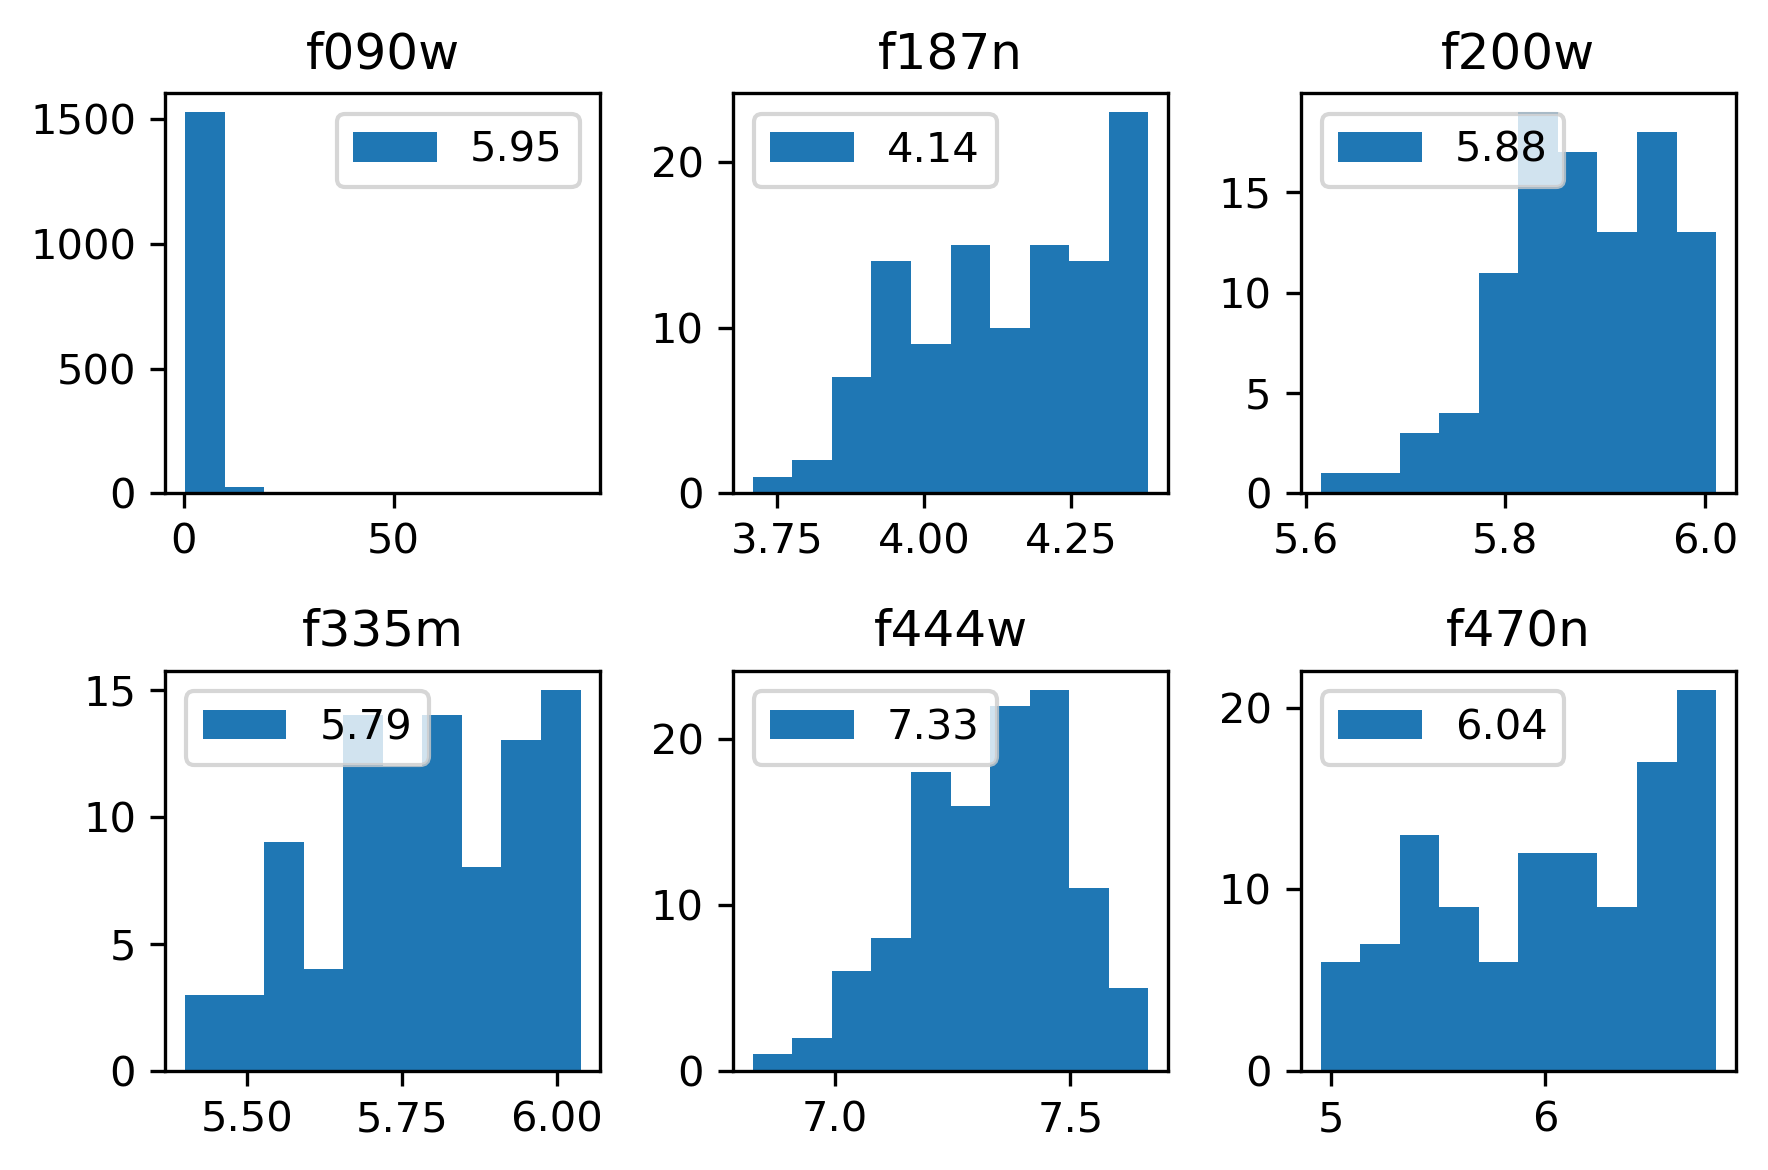

In [1308]:
head = ['ID', 'x', 'y', 'mag_1','mag_2','mag_3','mag_4','mag_5','mag_6','mag_7','mag_8','mag_9','mag_10','mag_11','mag_12']
filt = 'f187n'

zps = []

fig, ax = plt.subplots(2,3,dpi=300)
i = j = 0
for filt in filters:

    ap_test_adu = pd.read_csv("/users/breannacrompvoets/DAOPHOT/NGC3324/"+filt+"_zp.ap", header=None,delim_whitespace=True, skiprows=3, names=head).iloc[::2, :]
    ap_test_mjysr = pd.read_csv("~/DAOPHOT/NGC3324/RESULTS_MJYSR/"+filt+"_zp_jy.ap", header=None,delim_whitespace=True, skiprows=3, names=head).iloc[::2, :]

    hdu = fits.open(f'/users/breannacrompvoets/DAOPHOT/NGC3324/RESULTS_MJYSR/'+filt+'.fits')
    k = ap_test_adu.mag_11+2.5*np.log10(ap_test_mjysr.mag_11*hdu[0].header['PIXAR_SR']*10**6*np.pi*rads[-2]**2) # flux in Jy is flux in MJy/sr * sr/px * Jy/MJy * area of aperature in pix
    print(rads[-2])
    k = k[k>-90]
    zps.append(np.nanmean(k))#10**(np.nanmean(k)/2.5))
    ax[i][j].hist(k,label=f'{np.nanmean(k):4.2f}')#,bins= range(0,50))
    ax[i][j].set_title(filt)
    ax[i][j].legend()
    j+=1
    if j==3:
        i = 1
        j = 0

fig.tight_layout()

# Apply ZPs and change from flux to Vega mags

In [1318]:
head = ['Index','x','y','f090w','e_f090w','f187n','e_f187n','f200w','e_f200w','f335m','e_f335m','f444w','e_f444w','f470n','e_f470n']
filepath = '/users/breannacrompvoets/DAOPHOT/NGC3324/'
dao = pd.read_csv(filepath+"ngc3324_pi.raw", header=None,delim_whitespace=True, skiprows=3, names=head).iloc[::2, :]
dao.set_index('Index',inplace=True)
dao.where(dao!=99.9999, np.nan,inplace=True)
dao.where(dao!=9.9999, np.nan,inplace=True)
dao

x         y   f090w  e_f090w   f187n  e_f187n   f200w  \
Index                                                                    
1.0         42.204  4439.155  16.211   0.0693  15.321   0.0262  12.718   
2.0         50.768   513.318  16.724   0.0666  16.351   0.0473  13.687   
3.0         51.753   505.226  15.865   0.0365  15.099   0.0281  12.434   
4.0         55.969  1144.317  16.448   0.0743  16.462   0.0831  13.681   
5.0         69.665  1584.088  16.939   0.0835  16.183   0.0762  13.781   
...            ...       ...     ...      ...     ...      ...     ...   
18342.0  14166.960   998.771     NaN      NaN     NaN      NaN  13.563   
18343.0  14170.900   479.594  15.011   0.0412  14.449   0.0760     NaN   
18344.0  14177.700  1016.987     NaN      NaN     NaN      NaN  14.924   
18345.0  14178.100   856.664     NaN      NaN     NaN      NaN  13.860   
18346.0  14181.770   590.579     NaN      NaN     NaN      NaN  11.974   

         e_f200w   f335m  e_f335m   f444w  e_f444w   f470n  e_f470n  
Index                                                                
1.0       0.0314     NaN      NaN     NaN      NaN     NaN      NaN  
2.0       0.0269     NaN      NaN     NaN      NaN     NaN      NaN  
3.0       0.0175     NaN      NaN     NaN      NaN     NaN      NaN  
4.0       0.0264     NaN      NaN     NaN      NaN     NaN      NaN  
5.0       0.0244     NaN      NaN     NaN      NaN     NaN      NaN  
...          ...     ...      ...     ...      ...     ...      ...  
18342.0   0.0165  15.927   0.0291  15.223   0.0225     NaN      NaN  
18343.0      NaN  13.602   0.0236  12.966   0.0331  16.296   0.0242  
18344.0   0.0275  17.171   0.0533  16.134   0.0333     NaN      NaN  
18345.0   0.0318  16.248   0.0380  15.553   0.0330     NaN      NaN  
18346.0   0.0231  14.561   0.0198  13.779   0.0192  17.221   0.0395  

[18346 rows x 14 columns]

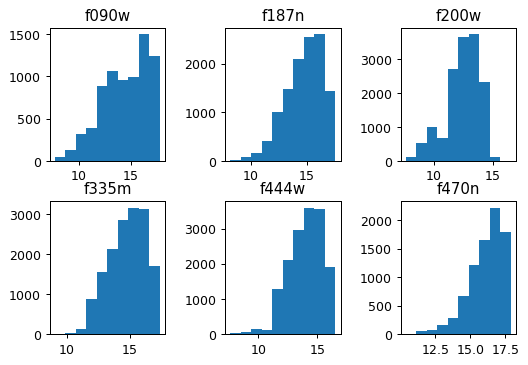

In [1319]:
fig,ax = plt.subplots(2,3,dpi=90)
fig.tight_layout()
i = j =0
for filt in filters:
    ax[i][j].hist(dao[filt])#,bins= range(0,50))
    ax[i][j].set_title(filt)
    j+=1
    if j==3:
        i = 1
        j = 0

In [1320]:
veg_zp = [26.29,22.37,25.60,23.78,24.30,20.22]
for f, filt in enumerate(filters):
    dao[filt] = -dao[filt]+zps[f]+veg_zp[f]
    # dao[filt] = -2.5*np.log10(dao[filt]*zps[f]*hdu[0].header['PHOTMJSR'])+veg_zp[f]

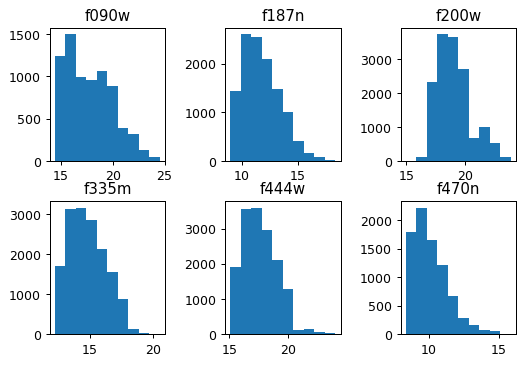

In [1321]:
fig,ax = plt.subplots(2,3,dpi=90)
fig.tight_layout()
i = j =0
for filt in filters:
    ax[i][j].hist(dao[filt])#,bins= range(0,50))
    ax[i][j].set_title(filt)
    j+=1
    if j==3:
        i = 1
        j = 0

In [1314]:
# cmd('f090w','f444w','f090w',dao)
# cmd('f090w','f444w','f187n',dao)
# cmd('f090w','f444w','f200w',dao)
# cmd('f090w','f444w','f335m',dao)
# cmd('f090w','f444w','f444w',dao)
# cmd('f090w','f444w','f470n',dao)
# ccd('f090w','f444w','f335m','f444w',dao)

# Compare to MAST
*1* Change the input ecsv's to .als file format

In [1215]:
def stsci_to_als(filepath, filt):
    if filt == 'f470n':
        mast = Table.read("../../ngc3324/NIRCAM_ALL_May112023/JWST/jw02731-o001_t017_nircam_f444w-f470n/jw02731-o001_t017_nircam_f444w-"+filt+"_cat.ecsv").to_pandas()
    else:
        mast = Table.read(filepath+filt+"/jw02731-o001_t017_nircam_clear-"+filt+"_cat.ecsv").to_pandas()
    x = mast.xcentroid
    y = mast.ycentroid
    mag = mast.isophotal_vegamag
    err = mast.isophotal_vegamag_err
    
    f = open(f"/Users/breannacrompvoets/DAOPHOT/STSci/{filt}.als",'w')
    f.write(" NL    NX    NY  LOWBAD HIGHBAD  THRESH     AP1  PH/ADU  RNOISE    FRAD\n 1 14215  8421   -54.3  5000.0  47.060   1.500  10.000   9.150   3.000\n \n")
    for i in range(0,len(x)):
        f.write(f"900{i} {x[i]}  {y[i]}  {mag[i]}  {err[i]}   0   1   0   0 \n")
    f.close()
    return f"{filt} is saved as als"

In [1216]:
!ls ../../ngc3324/NIRCAM_ALL_May112023/JWST/jw02731-o001_t017_nircam_f444w-f470n/

jw02731-o001_20230404t154755_image3_00001_asn.json
jw02731-o001_t017_nircam_f444w-f470n_cat.ecsv
jw02731-o001_t017_nircam_f444w-f470n_i2d.fits
jw02731-o001_t017_nircam_f444w-f470n_i2d.fits.zip
jw02731-o001_t017_nircam_f444w-f470n_segm.fits


In [1217]:
filt = 'f090w'
from astropy.table import Table
filepath_mast = '../../ngc3324/NIRCAM_ALL_May112023/JWST/jw02731-o001_t017_nircam_clear-'

# Take in x,y and isophotal mag from filt
# mast = Table.read(filepath_mast+filt+"/jw02731-o001_t017_nircam_clear-"+filt+"_cat.ecsv").to_pandas()
# dao_c = pd.read_csv(f"~/DAOPHOT/NGC3324/{filt}_ADU.coo", header=None,delim_whitespace=True, skiprows=3, names=cols_coo)
# dao_c.Mag = dao[filt]

# def closest_match(mast,dao):
#     ind = dao[((dao.x-mast.xcentroid)**2+(dao.y-mast.ycentroid)**2)].index
#     return ind
for filt in filters:
    stsci_to_als(filepath=filepath_mast,filt=filt)



In [1220]:
mast = pd.read_csv("/Users/breannacrompvoets/DAOPHOT/STSci/ngc3324_pi.raw", header=None,delim_whitespace=True, skiprows=3, names=head).iloc[::2, :]
mast.set_index('Index',inplace=True)
mast.where(mast!=99.9999, np.nan,inplace=True)
mast.where(mast!=9.9999, np.nan,inplace=True)
mast

x         y    f090w  e_f090w    f187n  e_f187n    f200w  \
Index                                                                      
1.0        29.788  5230.003  20.2749   0.0075  18.4304   0.0099  18.3520   
2.0        40.488   572.011  22.9074   0.0231  19.0723   0.0135  18.8929   
3.0        49.438  4609.086  22.3318   0.0108  18.9286   0.0092  18.7399   
4.0        59.717  5264.316  21.5021   0.0073  18.1111   0.0060  17.9413   
5.0        76.239  5701.950  21.3301   0.0088  17.3920   0.0042  17.2528   
...           ...       ...      ...      ...      ...      ...      ...   
5792.0  14145.420  7589.840  18.8074   0.0026  17.3124   0.0044  17.1956   
5793.0  14150.040  6838.134  19.6401   0.0033  17.3928   0.0046  17.3208   
5794.0  14154.410  6964.085  21.6107   0.0091  17.9239   0.0064  17.2319   
5795.0  14170.210   478.669  23.8506   0.0270  19.7818   0.0132  19.0087   
5796.0  14177.230   636.178  19.2455   0.0026  16.5650   0.0023  15.7621   

        e_f200w    f335m  e_f335m    f444w  e_f444w    f470n  e_f470n  
Index                                                                  
1.0      0.0034      NaN      NaN      NaN      NaN      NaN      NaN  
2.0      0.0038      NaN      NaN      NaN      NaN      NaN      NaN  
3.0      0.0026      NaN      NaN      NaN      NaN      NaN      NaN  
4.0      0.0020      NaN      NaN      NaN      NaN      NaN      NaN  
5.0      0.0018      NaN      NaN      NaN      NaN      NaN      NaN  
...         ...      ...      ...      ...      ...      ...      ...  
5792.0   0.0016      NaN      NaN      NaN      NaN      NaN      NaN  
5793.0   0.0017      NaN      NaN      NaN      NaN      NaN      NaN  
5794.0   0.0021      NaN      NaN      NaN      NaN      NaN      NaN  
5795.0   0.0027      NaN      NaN      NaN      NaN      NaN      NaN  
5796.0   0.0012  15.5041   0.0021  15.3372   0.0018  15.1082    0.004  

[5796 rows x 14 columns]

/var/folders/qy/7yz8bmv96hx8rndql_rfdz_80000gn/T/ipykernel_5189/2685430073.py:3: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(ax0)


f470n


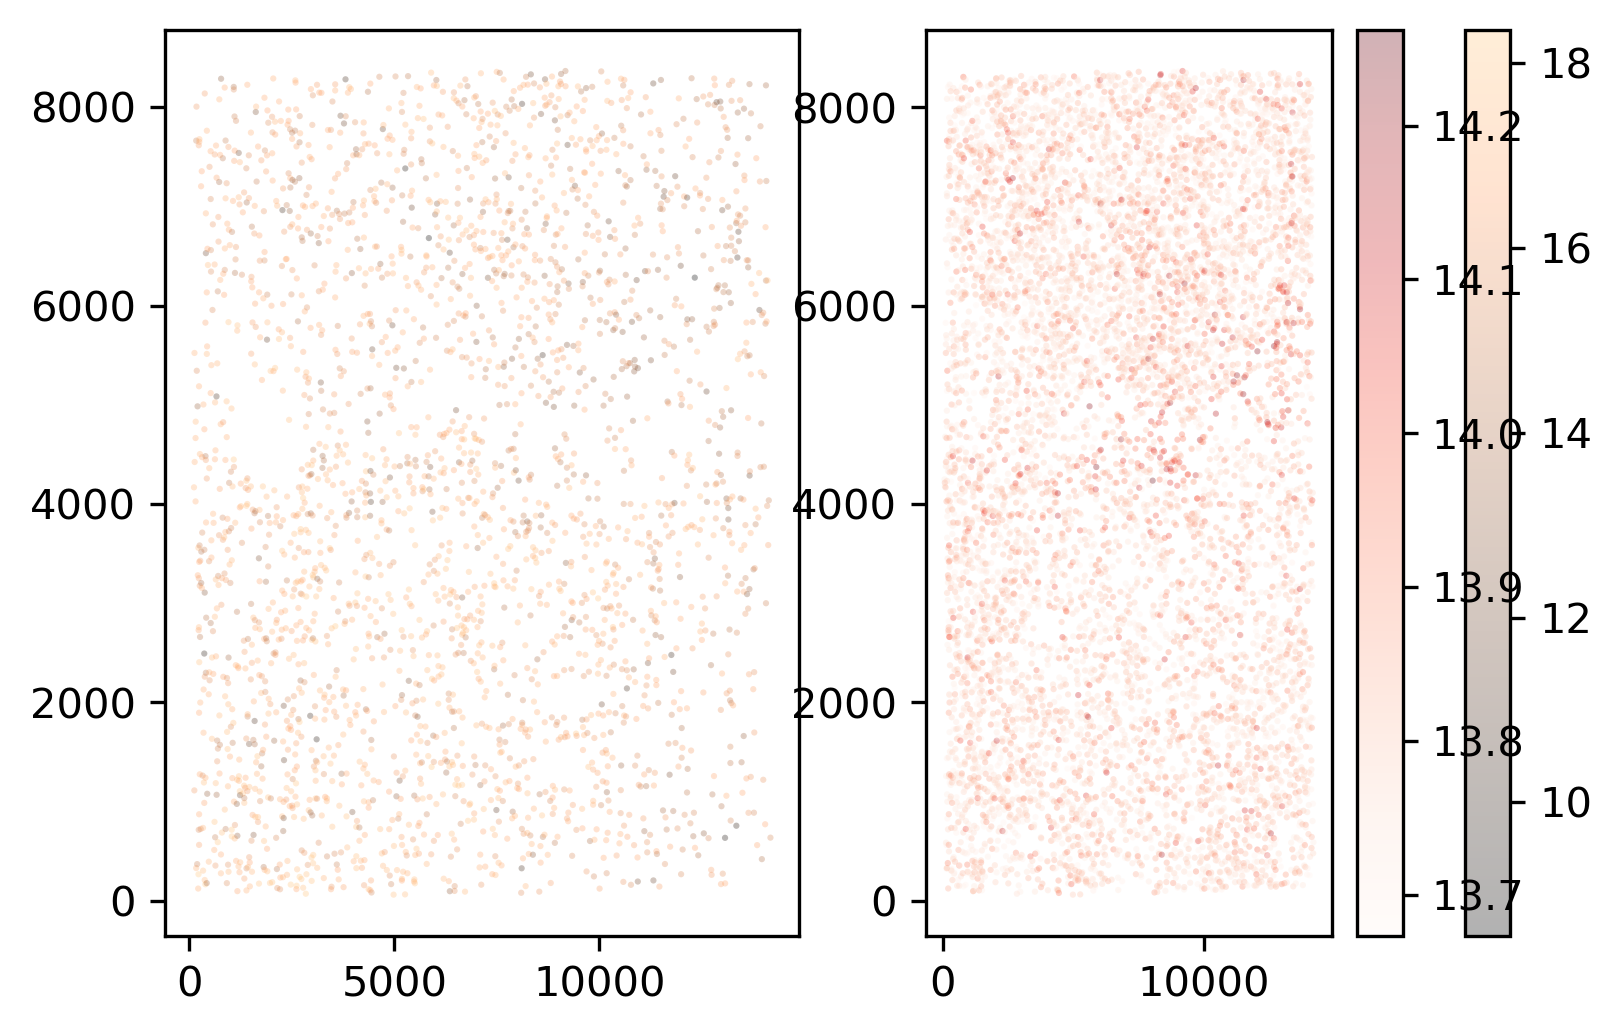

In [1224]:
fig, axs = plt.subplots(1,2,dpi=300)
ax0 = axs[0].scatter(mast.x,mast.y,alpha=0.3,c=mast[filt],marker='.', s=1,cmap='copper')
fig.colorbar(ax0)
ax1 = axs[1].scatter(dao.x,dao.y,alpha=0.3,c=dao[filt],marker='.', s=1,cmap='Reds')
fig.colorbar(ax1)
print(filt)

In [1225]:

def closest_match(mast,dao):
    ind = dao[((dao.x-mast.x)**2+(dao.y-mast.y)**2)].index
    return ind

In [ ]:
for i in range(0,len(mast)):
    